In [1]:
#Alumnos:
#Belosevich Mugerli, Victor Marcelo 97757
#Pereira, Martin 95793
#Petrucci, Maximiliano 95872
#link a repositorio de github: https://github.com/Belovic94/TP1-Analisis-Exploratorio

In [2]:
import datetime as datetime
import pandas as pd
import numpy as np
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

#Permite ver los graficos sin colocar plt.show
%matplotlib inline 

In [3]:
propiedades = pd.read_csv("properati-AR-2017-08-01-properties-sell.csv", low_memory = False)
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187482 entries, 0 to 187481
Data columns (total 27 columns):
id                            187482 non-null object
created_on                    187482 non-null object
operation                     187482 non-null object
property_type                 187482 non-null object
place_name                    187447 non-null object
place_with_parent_names       187482 non-null object
country_name                  187482 non-null object
state_name                    187482 non-null object
geonames_id                   158318 non-null float64
lat-lon                       118761 non-null object
lat                           118761 non-null float64
lon                           118761 non-null float64
price                         154443 non-null float64
currency                      154441 non-null object
price_aprox_local_currency    154443 non-null float64
price_aprox_usd               154443 non-null float64
surface_total_in_m2           12502



# FILTRADO DE DATOS

In [4]:
#Convierto la fecha de crecion en un datetime64[ns]
propiedades['created_on'] = pd.to_datetime(propiedades['created_on'])

#Se procede a filtrar las propiedades anteriores al 2014
propiedades = propiedades[propiedades.created_on.dt.year > 2013]

In [5]:
#Obtengo los datos de Capital Federal y de GBA
propiedadesCapGBA = propiedades.loc[(propiedades.state_name.str.contains('Capital Federal') | propiedades.state_name.str.contains('G.B.A') ) & propiedades.operation.str.contains('sell') , ['created_on','operation', 'property_type', 'state_name', 'place_name', 'lat', 'lon', 'price', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'description']]
propiedadesCapGBA = propiedadesCapGBA.loc[propiedadesCapGBA['place_name'] != 'Capital Federal', :]

In [6]:
#Filtro los datos cuyo precio por mt2 sea menor que 10000 y mayor a 100
propiedadesMenor10K = propiedadesCapGBA.loc[propiedadesCapGBA['price_usd_per_m2'] > 100, :].loc[propiedadesCapGBA['price_usd_per_m2'] < 10000,:]

In [7]:
#Filtro los registros que no tienen latitud ni longitud.
propiedadesMenor10K = propiedadesMenor10K.loc[propiedadesMenor10K['lat'].notnull() & propiedadesMenor10K['lat'].notnull(), :]

In [8]:
#Quiero ver la media y la mediana del mt2 en usd por barrio como tmb la cantidad de propiedades en cada barrio.
groupbyPlace = propiedadesMenor10K[['place_name', 'price_usd_per_m2']].groupby('place_name', as_index = False)['price_usd_per_m2']\
.agg({'media_por_barrio': np.mean, 'mediana_por_barrio': np.median, 'cant_prop': np.size})
groupbyPlace = groupbyPlace.loc[groupbyPlace['cant_prop'] > 4, :]

propiedadesPorBarrio = pd.merge(propiedadesMenor10K, groupbyPlace, on = 'place_name')
propiedadesPorBarrio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46683 entries, 0 to 46682
Data columns (total 15 columns):
created_on               46683 non-null datetime64[ns]
operation                46683 non-null object
property_type            46683 non-null object
state_name               46683 non-null object
place_name               46683 non-null object
lat                      46683 non-null float64
lon                      46683 non-null float64
price                    46683 non-null float64
surface_total_in_m2      46683 non-null float64
surface_covered_in_m2    44215 non-null float64
price_usd_per_m2         46683 non-null float64
description              46683 non-null object
cant_prop                46683 non-null float64
media_por_barrio         46683 non-null float64
mediana_por_barrio       46683 non-null float64
dtypes: datetime64[ns](1), float64(9), object(5)
memory usage: 5.7+ MB


In [9]:
propiedadesPorBarrio = propiedadesPorBarrio.loc[propiedadesPorBarrio.surface_total_in_m2 <= 1000, :].reset_index()
propiedadesPorBarrio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46017 entries, 0 to 46016
Data columns (total 16 columns):
index                    46017 non-null int64
created_on               46017 non-null datetime64[ns]
operation                46017 non-null object
property_type            46017 non-null object
state_name               46017 non-null object
place_name               46017 non-null object
lat                      46017 non-null float64
lon                      46017 non-null float64
price                    46017 non-null float64
surface_total_in_m2      46017 non-null float64
surface_covered_in_m2    43610 non-null float64
price_usd_per_m2         46017 non-null float64
description              46017 non-null object
cant_prop                46017 non-null float64
media_por_barrio         46017 non-null float64
mediana_por_barrio       46017 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(1), object(5)
memory usage: 5.6+ MB


In [10]:
propiedadesPorBarrio['surface_total_in_m2'].describe()

count    46017.000000
mean       151.593781
std        162.753295
min         10.000000
25%         50.000000
50%         84.000000
75%        196.000000
max       1000.000000
Name: surface_total_in_m2, dtype: float64


# Análisis de  la relación entre el precio por m2 y la superficie total de la propiedad

In [11]:
groupbySurface = propiedadesPorBarrio.groupby(pd.cut(propiedadesPorBarrio['surface_total_in_m2'], range(0, 1001, 100)), as_index= False)
groupbySurface['price_usd_per_m2'].agg(['mean','median' ,'size'])

,mean,median,size
surface_total_in_m2,,,
"(0, 100]",2295.132021,2166.666667,26097
"(100, 200]",2111.263947,1788.804356,9166
"(200, 300]",1630.663168,1260.686883,5016
"(300, 400]",1382.642545,1014.605544,2478
"(400, 500]",1354.791417,940.000000,1222
"(500, 600]",1089.809137,687.964841,634
"(600, 700]",1003.368900,625.000000,413
"(700, 800]",680.776104,415.584416,406
"(800, 900]",595.955327,415.700307,332


Se puede ver claramente que el precio por m2 no esta relacionado con la cantidad de m2 que tenga la propiedad.

#### La cantidad de propiedades menores a 100 m2 indica que hay una mayor cantidad de departamentos.

# Análisis del tipo de propiedades 

### Queremos saber que tipo de propiedad predomina en la los barrios con más ventas

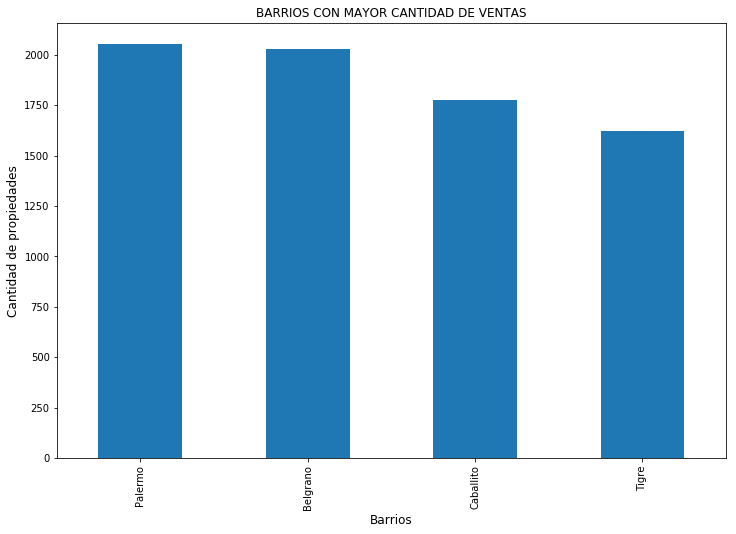

In [12]:
#Vemos los barrios que tienen mayor cantidad de ventas y lo utilizo para saber que tipo de propiedad se vendio mas
ventasPorBarrio = propiedadesPorBarrio.groupby('place_name')
ventasPorBarrioTop5 = ventasPorBarrio['created_on'].count().sort_values(ascending = False).head(4)
ventasPorBarrioTop5.plot(kind = 'bar', figsize= (12, 8))

plt.ylabel('Cantidad de propiedades', fontsize = 12);
plt.xlabel('Barrios', fontsize = 12);
plt.title('BARRIOS CON MAYOR CANTIDAD DE VENTAS')

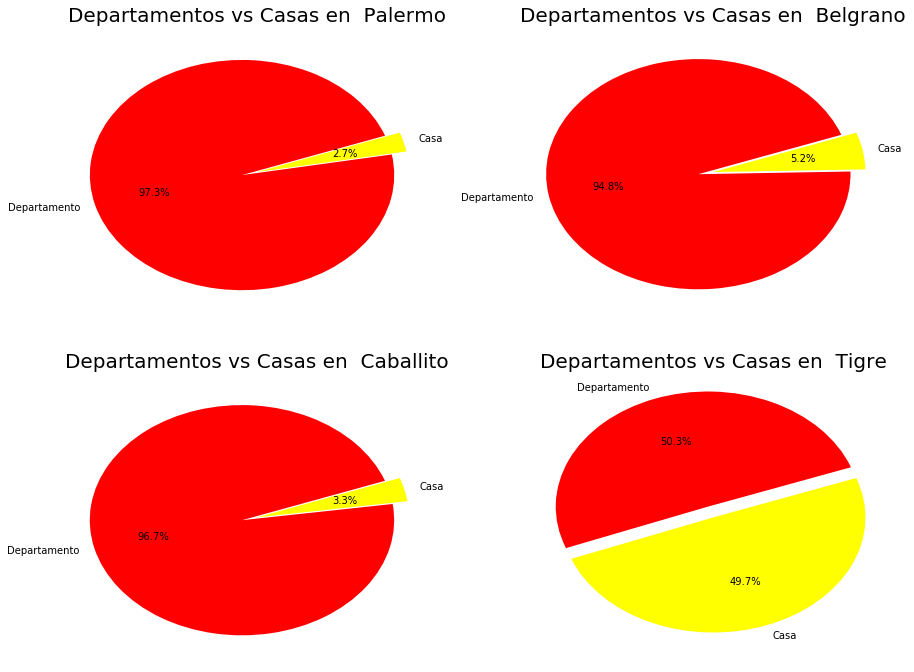

In [13]:
#Vemos que tipo de propiedad se vendio mas en los barrios con mayores ventas
dataTipoProp = [ventasPorBarrio.get_group('Palermo'), ventasPorBarrio.get_group('Belgrano'), ventasPorBarrio.get_group('Caballito'), ventasPorBarrio.get_group('Tigre')]
dataNombres = ['Palermo', 'Belgrano', 'Caballito', 'Tigre']
nombres = ['Departamento', 'Casa']

plt.figure(figsize=(15, 18));

for i in range(len(dataTipoProp)):
    tam = []
    tam.append(dataTipoProp[i].loc[dataTipoProp[i]['property_type'] == 'apartment', :]['created_on'].count())
    tam.append(dataTipoProp[i].loc[dataTipoProp[i]['property_type'] == 'house', :]['created_on'].count()) 
    
    ax = plt.subplot(321 + i );
    plt.pie(tam, labels = nombres, autopct='%1.1f%%', startangle = 20, colors=['red', 'yellow'], explode=(0.1, 0))
    plt.title('Departamentos vs Casas en  ' + dataNombres[i], fontsize = 20);
   

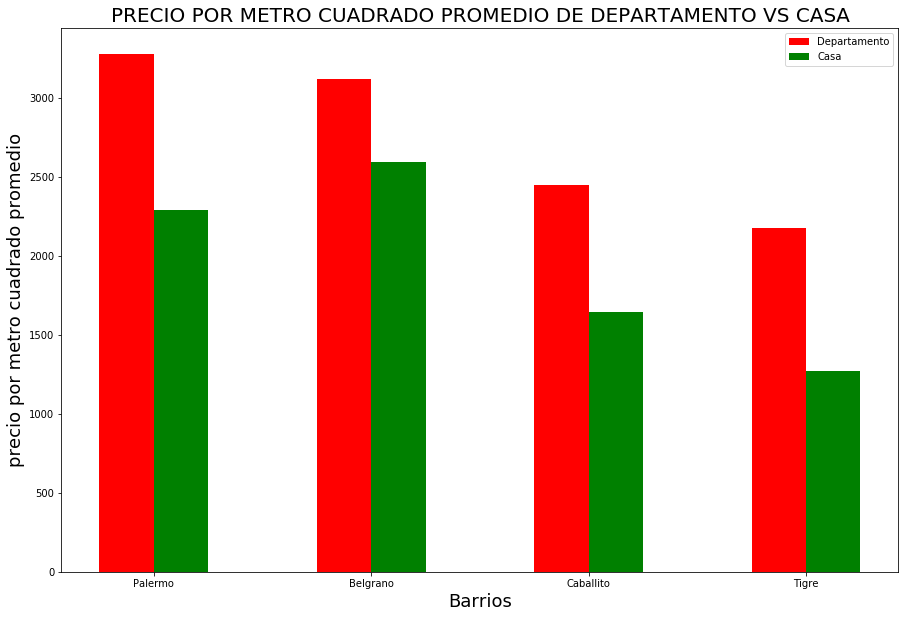

In [14]:
#Vemos que propiedad posee en promedio un mayor precio por m2 
deptosMean = []
casasMean = []

plt.figure(figsize=(15, 10));

for i in range(len(dataTipoProp)):
    deptosMean.append(dataTipoProp[i].loc[dataTipoProp[i]['property_type'] == 'apartment', :]['price_usd_per_m2'].mean())
    casasMean.append(dataTipoProp[i].loc[dataTipoProp[i]['property_type'] == 'house', :]['price_usd_per_m2'].mean())

x = np.arange(4)
plt.bar(x, deptosMean, color = 'red', width=0.25 );
plt.bar(x + 0.25, casasMean, color ='green',  width=0.25 );
plt.xticks(x + 0.125, dataNombres, size = 'medium')
plt.title('PRECIO POR METRO CUADRADO PROMEDIO DE DEPARTAMENTO VS CASA', fontsize = 20)
plt.xlabel('Barrios', fontsize = 18)
plt.ylabel('precio por metro cuadrado promedio', fontsize = 18)
plt.legend(nombres)


### Se puede ver claramente que en los barrios con mayores ventas, la propiedad que predomina son los departamentos y en dichos barrios el precio por m2 de los mismos es superior al de las otras propiedades

## Ahora analizo para los barrios donde predominan las casas sobre los departamentos

In [15]:
#Filtro para eliminar los Store y quedarme solo con casas y departamentos
dataSoloCasasyDeptos = propiedadesPorBarrio.loc[(propiedadesPorBarrio['property_type'] == 'house') | (propiedadesPorBarrio['property_type'] == 'apartment'), :]
dataSoloCasasyDeptosBarrios = dataSoloCasasyDeptos.loc[dataSoloCasasyDeptos['place_name'].notnull(),:]
listaBarrios = dataSoloCasasyDeptosBarrios.loc[:,'place_name'].drop_duplicates().tolist()

In [16]:
#Veamos cuales son los barrios que tienen una diferencia entre la cantidad de casas y departamentos de mas de 10 unidades.
from heapq import heappush, nlargest

ventasPorBarrio = dataSoloCasasyDeptos.groupby('place_name')
barriosMayorCasasQueDeptos = []
nombres = ['Departamento', 'Casa']

for i in range(len(listaBarrios)):
    tam = []
    barrio = ventasPorBarrio.get_group(listaBarrios[i])
    tam.append(barrio.loc[barrio['property_type'] == 'apartment', :]['created_on'].count())
    tam.append(barrio.loc[barrio['property_type'] == 'house', :]['created_on'].count())
    diff = tam[1] - tam[0] #diferencia entre la cantidad casas y departamentos
    if (diff > 10):
        barriosMayorCasasQueDeptos.append((listaBarrios[i], tam, barrio, diff))

#Se eligen los 5 barrios con mayor diferencia entre la cantidad de casas y deptos
dataCasasMayorDeptos = list(map(lambda x: (x[0], x[1], x[2]), nlargest(4, barriosMayorCasasQueDeptos, key = lambda x: x[3]))) 

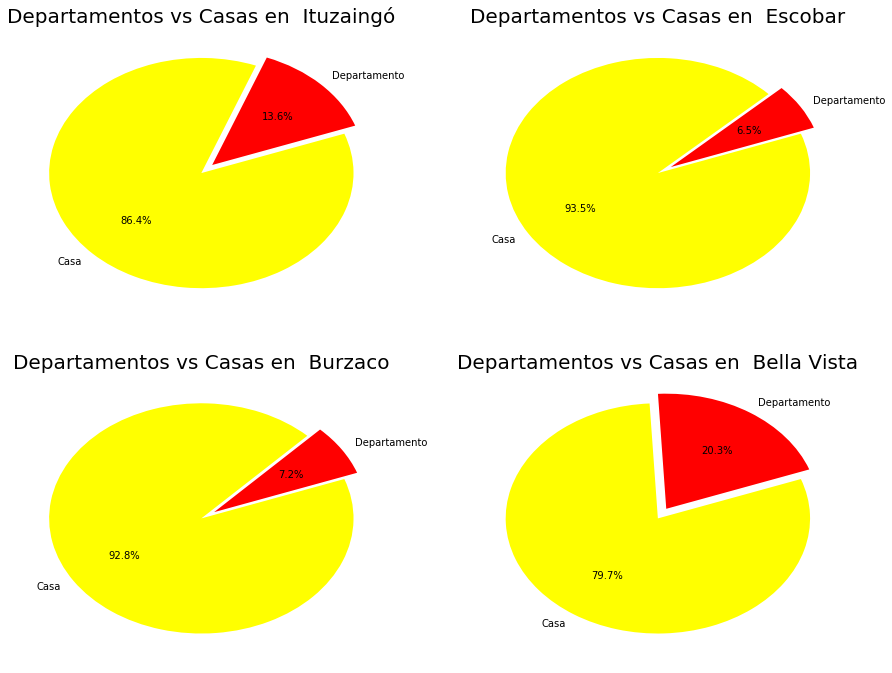

In [17]:
deptosMean = []
casasMean = []
dataNombres = []

plt.figure(figsize=(15, 18));

for i in range(len(dataCasasMayorDeptos)):
    barrio = dataCasasMayorDeptos[i][2]
    deptosMean.append(barrio.loc[barrio['property_type'] == 'apartment', :]['price_usd_per_m2'].mean())
    casasMean.append(barrio.loc[barrio['property_type'] == 'house', :]['price_usd_per_m2'].mean())
    dataNombres.append(dataCasasMayorDeptos[i][0])
    
    ax = plt.subplot(321 + i );
    plt.pie(dataCasasMayorDeptos[i][1], labels = nombres, autopct='%1.1f%%', startangle = 20, colors=['red', 'yellow'], explode=(0.1, 0))
    plt.title('Departamentos vs Casas en  ' + dataCasasMayorDeptos[i][0], fontsize = 20);


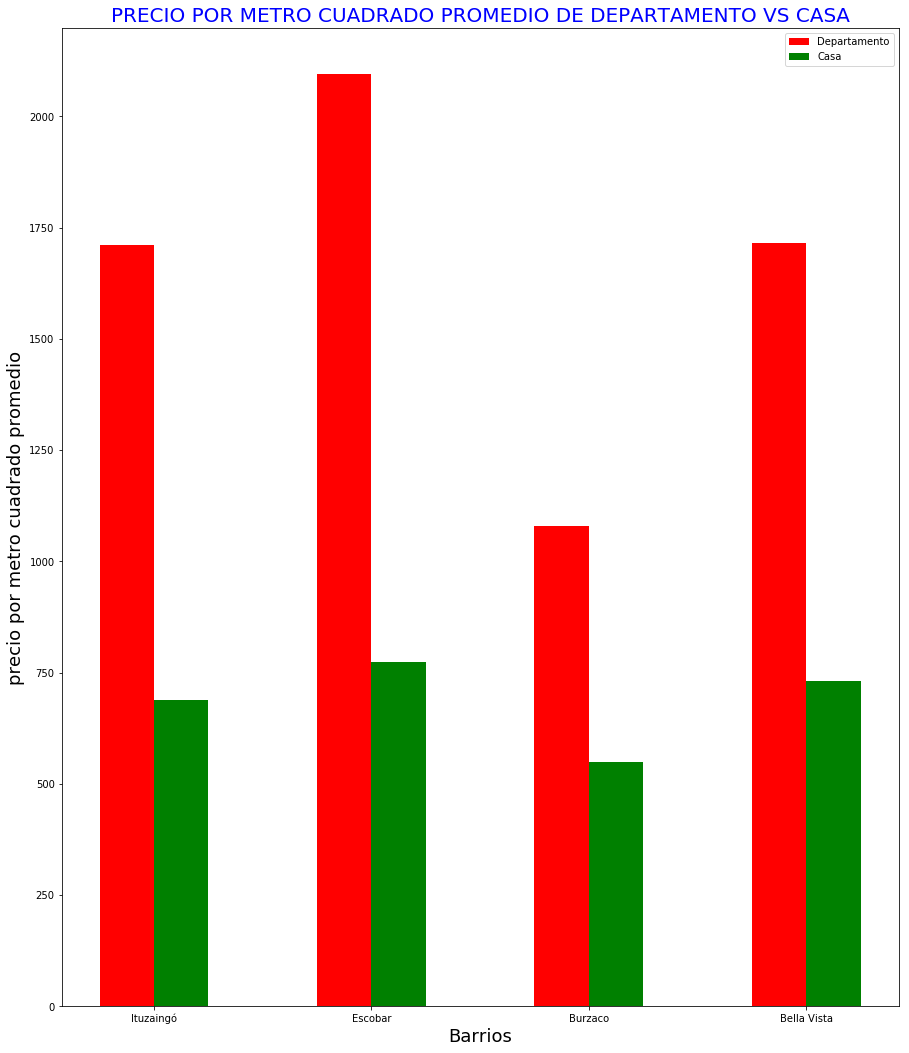

In [18]:
plt.figure(figsize=(15, 18));
x = np.arange(4)
plt.bar(x, deptosMean, color = 'red', width=0.25 );
plt.bar(x + 0.25, casasMean, color ='green',  width=0.25 );
plt.xticks(x + 0.125, dataNombres, size = 'medium')
plt.title('PRECIO POR METRO CUADRADO PROMEDIO DE DEPARTAMENTO VS CASA', fontsize = 20, color = 'blue')
plt.xlabel('Barrios', fontsize = 18)
plt.ylabel('precio por metro cuadrado promedio', fontsize = 18)
plt.legend(nombres)

## Analizo el crecimiento en las ventas de departamentos de los ultimos 2 años

In [19]:
#Cantidad de departamentos publicados en 2017
deptos2017 = propiedadesPorBarrio.loc[(propiedadesPorBarrio.created_on.dt.year == 2017) & (propiedadesPorBarrio.property_type == 'apartment'), :]
deptos2017['created_on'].count()

20766

In [20]:
#Cantidad de departamentos publicados en 2016
deptos2016 = propiedadesPorBarrio.loc[(propiedadesPorBarrio.created_on.dt.year == 2016) & (propiedadesPorBarrio.property_type == 'apartment'), :]
deptos2016['created_on'].count()

6690

In [21]:
#Cantidad de departamentos publicados en 2015
deptos2015 = propiedadesPorBarrio.loc[(propiedadesPorBarrio.created_on.dt.year == 2015) & (propiedadesPorBarrio.property_type == 'apartment'), :]
deptos2015['created_on'].count()

1451

#### El crecimiento de los departamentos en los últimos años es significativo y es justamente eso lo que hace que el precio de dichas propiedades aumenten.

### Conclusión: el precio por m2 de los departamentos es mayor al de las casas y esto no solo pasa en los barrios en el que predominan los departamentos sino tambien en aquellos barrios en los cuales hay mayor cantidad de casas. Esto se debe a que hay una mayor demanda de departamentos que de cualquier otro tipo de propiedad y esto es justamente lo que aumenta su precio con respecto a las demas propiedades.

# Análisis de la cantidad de ventas por barrio

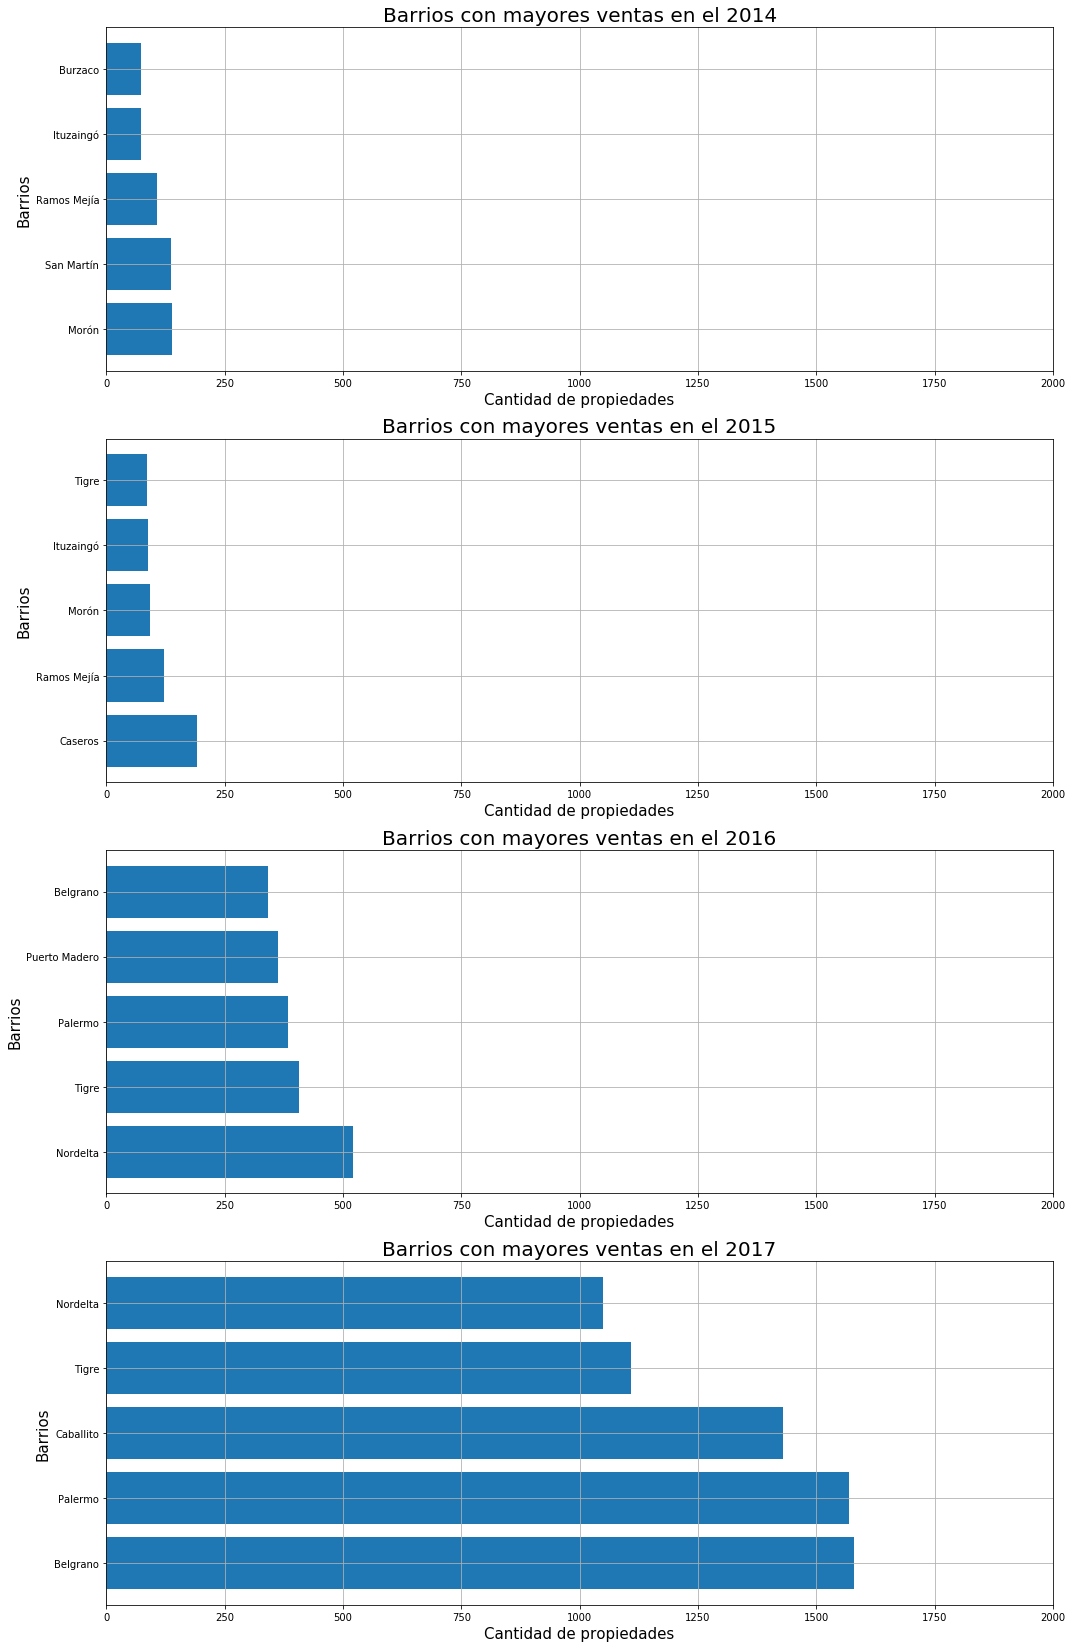

In [22]:
#Veo cuales son los barrios que obtuvieron la mayor cantidad de ventas en los ultimos 4 anios

barrios2017 = propiedadesPorBarrio[propiedadesPorBarrio.created_on.dt.year == 2017]
barrios2016 = propiedadesPorBarrio[propiedadesPorBarrio.created_on.dt.year == 2016]
barrios2015 = propiedadesPorBarrio[propiedadesPorBarrio.created_on.dt.year == 2015]
barrios2014 = propiedadesPorBarrio[propiedadesPorBarrio.created_on.dt.year == 2014]

barrios = [barrios2014, barrios2015, barrios2016, barrios2017]
barrios_anios = ['2014', '2015', '2016', '2017']

plt.figure(figsize=(15, 23));

for i in range(len(barrios)):
    barrios[i] = barrios[i].groupby('place_name')['cant_prop'].count().sort_values(ascending=False)
    
    ax = plt.subplot(411 + i );
    ax.set_xlim([0, 2000]);

    plt.grid(True);
    plt.title('Barrios con mayores ventas en el ' + barrios_anios[i], fontsize = 20);
    plt.xlabel('Cantidad de propiedades', fontsize = 15);
    plt.ylabel('Barrios', fontsize = 15);
    ax.barh([j for j in range(5)], [valor for valor in barrios[i][:5].values], 
            tick_label=[viaje for viaje in barrios[i][:5].index.values]);
plt.tight_layout();


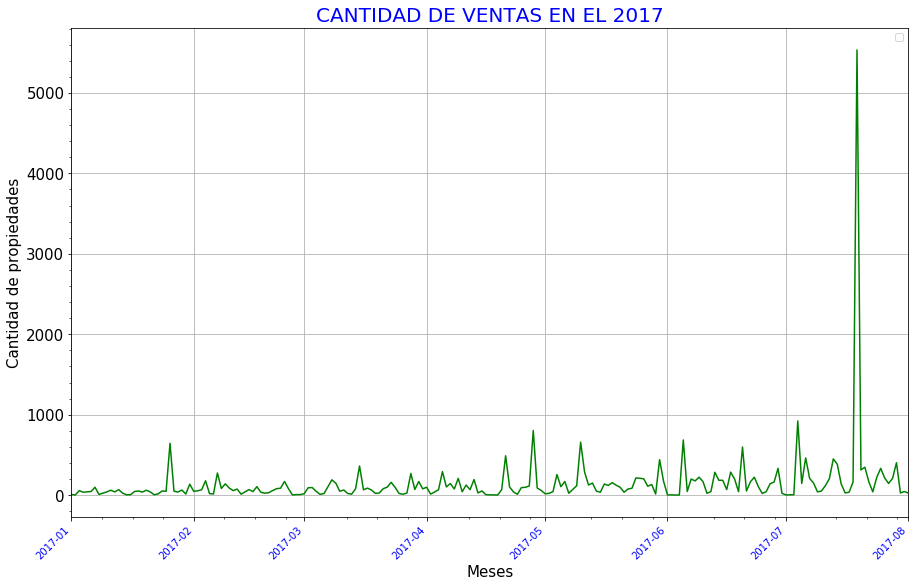

In [23]:
#Ventas realizadas durante el transcurso del 2017
dias2017 = barrios2017.groupby('created_on')['cant_prop'].count()

dias2017.plot.line(figsize=(15,10), color ='green', fontsize=15)
plt.xticks(size = 'medium', color = 'b',rotation = 45); 
plt.grid(True);
plt.minorticks_on();
plt.title(u'CANTIDAD DE VENTAS EN EL 2017', fontsize = 20, color = 'blue')  
plt.ylabel('Cantidad de propiedades', fontsize = 15);
plt.xlabel('Meses', fontsize = 15);
plt.legend('');

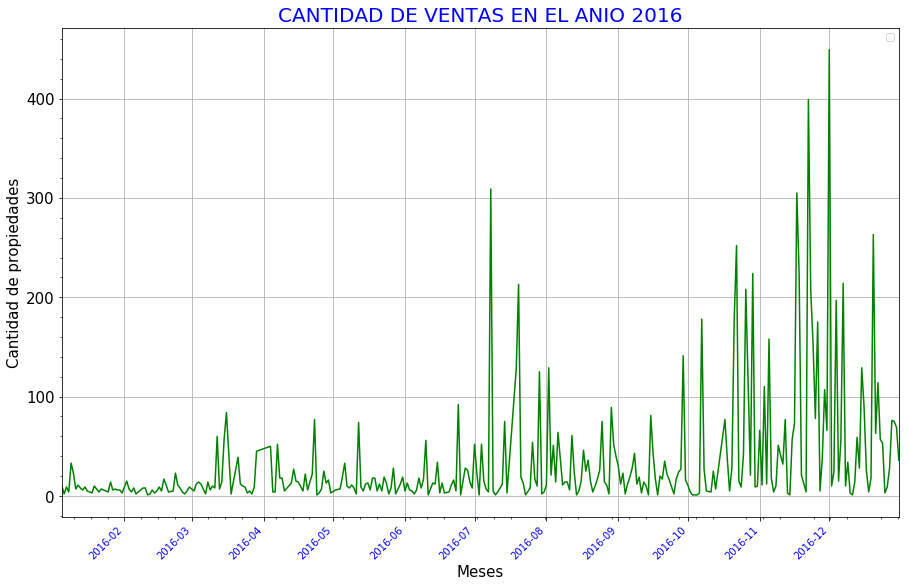

In [24]:
#Ventas realizadas durante el transcurso del 2016

dias2016 = barrios2016.groupby('created_on')['cant_prop'].count()

dias2016.plot.line(figsize=(15,10), color ='green', fontsize=15)
plt.xticks(size = 'medium', color = 'b',rotation = 45); 
plt.grid(True);
plt.minorticks_on();
plt.title(u'CANTIDAD DE VENTAS EN EL ANIO 2016', fontsize = 20, color = 'blue')
plt.ylabel('Cantidad de propiedades', fontsize = 15);
plt.xlabel('Meses', fontsize = 15);
plt.legend('');

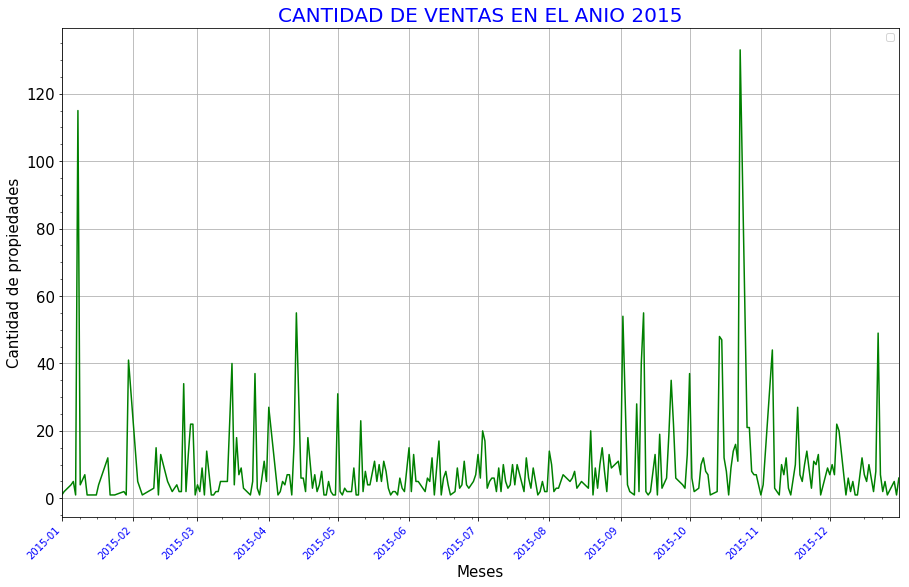

In [25]:
#Ventas realizadas durante el transcurso del 2015
dias2015 = barrios2015.groupby('created_on')['cant_prop'].count()

dias2015.plot.line(figsize=(15,10), color ='green', fontsize=15)
plt.xticks(size = 'medium', color = 'b',rotation = 45); 
plt.grid(True);
plt.minorticks_on();
plt.title(u'CANTIDAD DE VENTAS EN EL ANIO 2015', fontsize = 20, color = 'blue')  # Colocamos el título del gráfico
plt.ylabel('Cantidad de propiedades', fontsize = 15);
plt.xlabel('Meses', fontsize = 15);
plt.legend('');

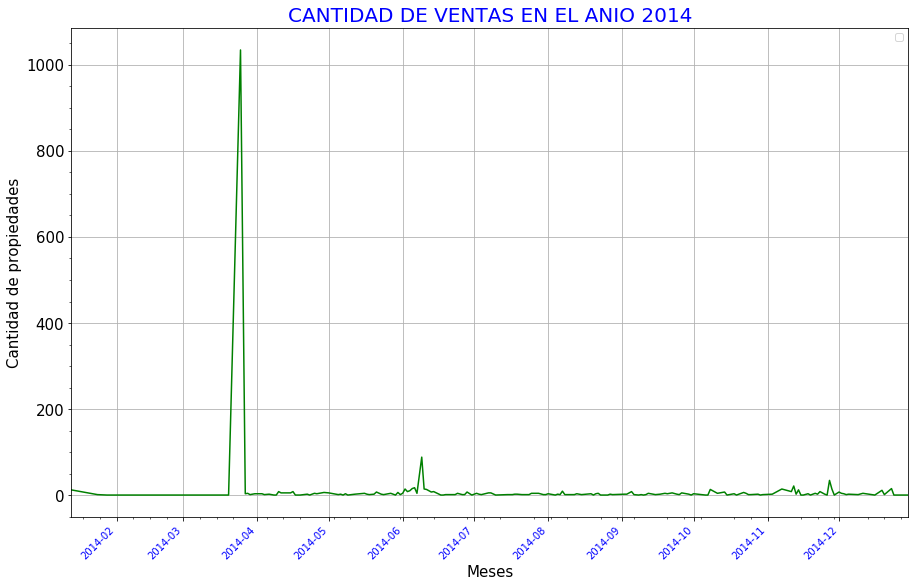

In [26]:
#Ventas realizadas durante el transcurso del 2014
dias2014 = barrios2014.groupby('created_on')['cant_prop'].count()

dias2014.plot.line(figsize=(15,10), color ='green', fontsize=15)
plt.xticks(size = 'medium', color = 'b',rotation = 45); 
plt.grid(True);
plt.minorticks_on();
plt.title(u'CANTIDAD DE VENTAS EN EL ANIO 2014', fontsize = 20, color = 'blue')  
plt.ylabel('Cantidad de propiedades', fontsize = 15);
plt.xlabel('Meses', fontsize = 15);
plt.legend('');

# Relación entre la localización de la propiedad y su precio por m2

In [27]:
#Funcion para calcular distancias entre coordenadas (lat, lon)
from math import sin,cos,sqrt,asin,pi

#Formula del Harvesine sacada de
#https://joseguerreroa.wordpress.com/2012/11/13/distancia-entre-dos-puntos-de-la-superficie-terrestre-mediante-la-formula-de-haversine-con-python/
#coord = (lat, long)
def distancia(coord1, coord2):
    rTierra = 6374000 #metros
    c = pi/180 #para pasar a raddianes
    d = 2*rTierra*asin(sqrt(sin(c*(coord2[0]-coord1[0])/2)**2 + cos(c*coord1[0])*cos(c*coord2[0])*sin(c*(coord2[1]-coord1[1])/2)**2))
    return d

def obtener_geoPos(reg):
    lat, lon = reg
    return lat,lon

In [28]:
#Obtengo la latitud y longitud en una tupla.
propiedadesDistancia = propiedadesPorBarrio.copy(deep=True)
propiedadesDistancia['geoPos'] = propiedadesDistancia.loc[:,['lat', 'lon']].apply(obtener_geoPos, axis = 1)
propiedadesDistancia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46017 entries, 0 to 46016
Data columns (total 17 columns):
index                    46017 non-null int64
created_on               46017 non-null datetime64[ns]
operation                46017 non-null object
property_type            46017 non-null object
state_name               46017 non-null object
place_name               46017 non-null object
lat                      46017 non-null float64
lon                      46017 non-null float64
price                    46017 non-null float64
surface_total_in_m2      46017 non-null float64
surface_covered_in_m2    43610 non-null float64
price_usd_per_m2         46017 non-null float64
description              46017 non-null object
cant_prop                46017 non-null float64
media_por_barrio         46017 non-null float64
mediana_por_barrio       46017 non-null float64
geoPos                   46017 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(6)
memory usage: 6.0

## 1) Análisis relacionado a la distancia al centro de la ciudad

In [29]:
def obtener_distancia_al_centro(geoPos):
    centro = (-34.608056,  -58.370278)# Se utilizo las coordenadas de la Casa Rosada
    return distancia(geoPos, centro)

In [30]:
#Obtengo las propiedades que se encuentren a menos de 64km del centro de la ciudad
propiedadesDistanciaCentro = propiedadesDistancia.copy(deep = True)
propiedadesDistanciaCentro.loc[:,'distancia_al_centro'] = propiedadesDistanciaCentro.loc[:, 'geoPos'].apply(obtener_distancia_al_centro)
propiedadesDistanciaCentro = propiedadesDistanciaCentro.loc[propiedadesDistanciaCentro.distancia_al_centro < 64000, :]

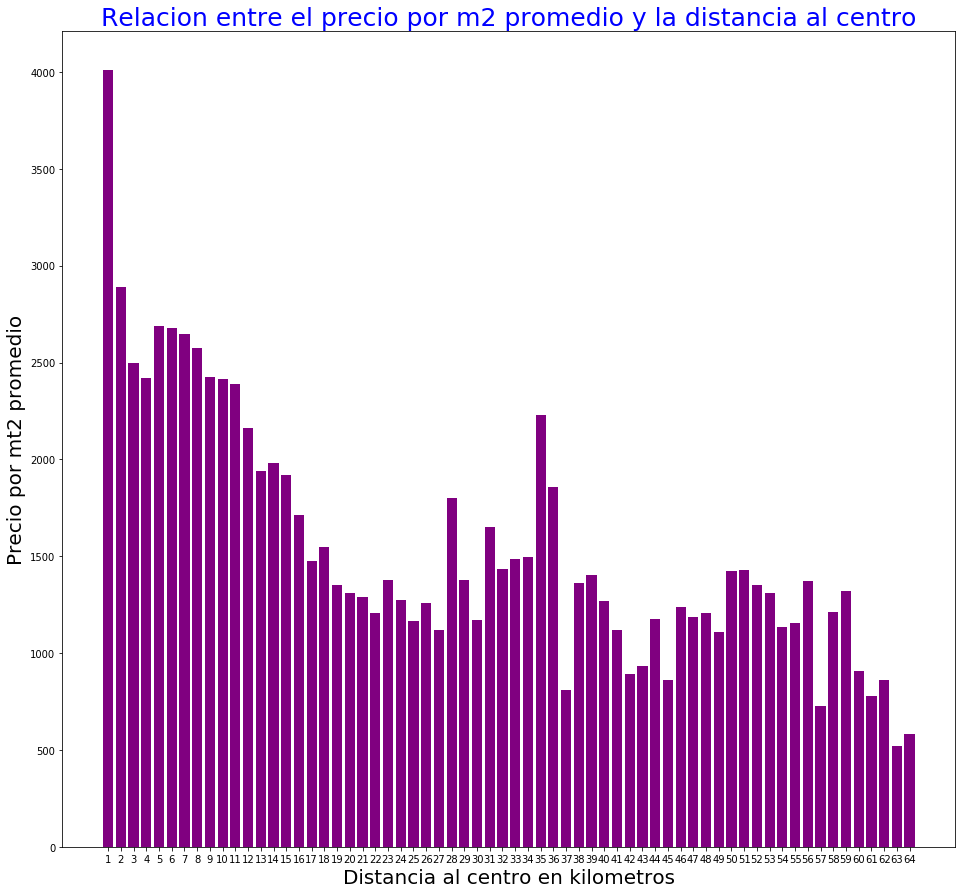

In [31]:
groupbyDistanciaCentro = propiedadesDistanciaCentro.groupby(pd.cut(propiedadesDistanciaCentro['distancia_al_centro'], range(0, 65000, 1000)), as_index= False)
mediaPorDistanciaCentro = groupbyDistanciaCentro['price_usd_per_m2'].agg(['mean'])
distKm = np.arange(groupbyDistanciaCentro.ngroups) + 1
plt.figure(figsize=(16, 15));
plt.bar(distKm, mediaPorDistanciaCentro['mean'], width= 0.8, color = 'purple')
plt.xticks(distKm, size = 'medium')
plt.title('Relacion entre el precio por m2 promedio y la distancia al centro', fontsize = 25, color = 'Blue')
plt.xlabel('Distancia al centro en kilometros', fontsize = 20)
plt.ylabel('Precio por mt2 promedio', fontsize = 20)

### Por lo general, el grafico demuestra una relacion inversamente proporcional entre la distancia al centro y el precio por m2 de la propiedad. Se puede ver tambien que hay una zona (desde 28 hasta 35 km) en la cual dicha relacion no se cumple , a continuacion se analizara dicho problema.

In [32]:
#Analizo la zona, en la cual el grafico anterior presenta problemas.(28 a 35 km)
zonaProblematica = propiedadesDistanciaCentro.loc[(propiedadesDistanciaCentro.distancia_al_centro < 35000) & (propiedadesDistanciaCentro.distancia_al_centro > 28000), :]\
.groupby('place_name')['price_usd_per_m2'].agg(['mean', 'size'])
zonaProblematica.sort_values('size', ascending = False).head()


,mean,size
place_name,,
Nordelta,2440.062640,1317
San Miguel,1260.380025,723
Tigre,1561.687502,515
Ituzaingó,681.406128,396
Muñiz,1299.996365,204


### La mayoria de las casas en dicha zona son de Nordelta, el cual es uno de los barrios mas caros, y el cual claramente no se ve afectado por la distancia al centro de la ciudad.

##### Su precio depende de otro factor el cual va ser analizado mas adelante.


## 2) Análisis relacionado a la distancia a villas de emergencia

In [33]:
#calcula la distancia en metros entre la propiedad y la villa Fuerte Apache. Recibe por parametro un registro
def distanciaAFuerteApache(geoPos):
      #Ubicacion
    fuerteApache = (-34.622374, -58.539921) #Tomamos este como el punto central de la villa
    return distancia(geoPos, fuerteApache)

#calcula la distancia en metros entre la propiedad y la villa Carlos Gardel. Recibe por parametro un registro
def distanciaACarlosGardel(geoPos):
    #Ubicacion
    carlosGardel = (-34.6244, -58.5778) #Tomamos este como el punto central de la villa
    return distancia(geoPos, carlosGardel)

#Informacion sacada de 
#http://blogs.monografias.com/estampas-de-buenos-aires/2015/05/21/las-villas-de-emergencia-en-la-ciudad/
def distanciaAVillas(geoPos):
    
    Indoamericano = (-34.665202, -58.468526)# Se tomaron estas coordenadas ya que alrededor hay una gran cantidad de villas
    return distancia(geoPos, Indoamericano)

In [34]:
#Arrancamos con el analisis sobre la conglomeracion de villas.
#Agregamos la distancia de las propiedades a la conglomeracion.
propiedadesCercanasAIndoamericano = propiedadesDistancia.copy(deep = True)
propiedadesCercanasAIndoamericano.loc[:, 'distanciaAIndoamericano'] = propiedadesCercanasAIndoamericano['geoPos'].apply(distanciaAVillas)

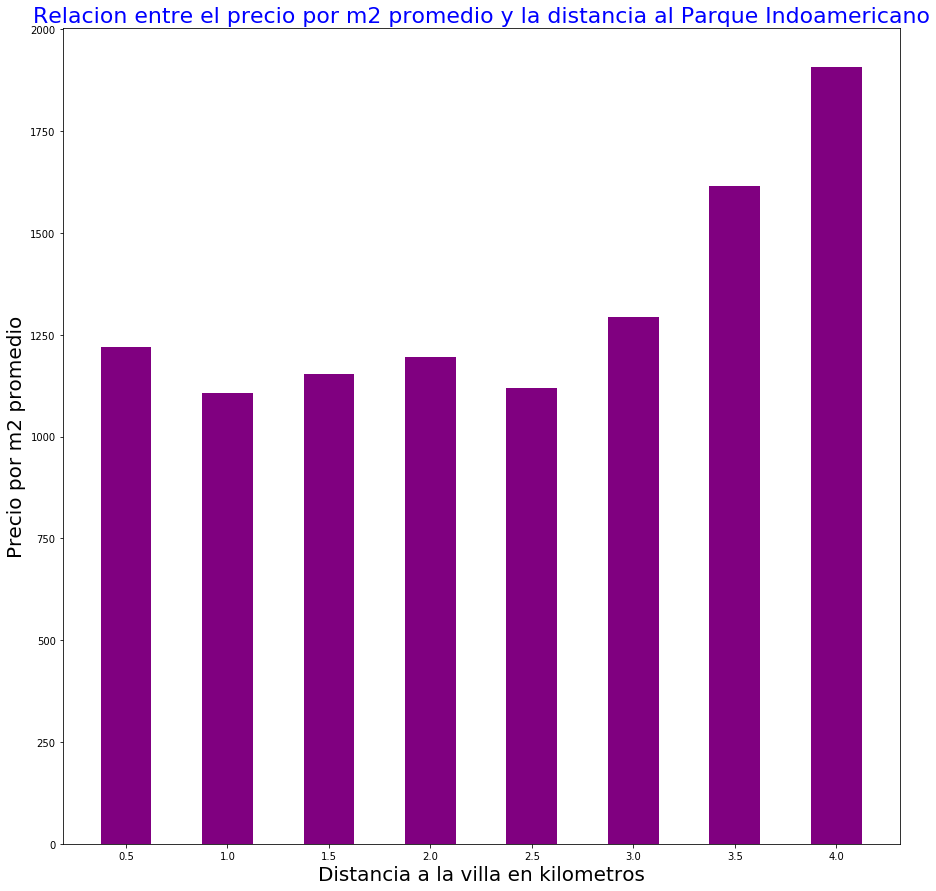

In [35]:
#vamos a comparar propiedades que estan entre 0mts a 4000mts de distancia.
propiedadesCercanasAIndoamericano4000 = propiedadesCercanasAIndoamericano.loc[propiedadesCercanasAIndoamericano['distanciaAIndoamericano'] < 4000, :]
groupbyDistVillas = propiedadesCercanasAIndoamericano4000.groupby(pd.cut(propiedadesCercanasAIndoamericano4000['distanciaAIndoamericano'], range(0, 4001, 500)), as_index= False)
mediaPrecioVilla = groupbyDistVillas['price_usd_per_m2'].agg(['mean'])
distKm = (np.arange(groupbyDistVillas.ngroups) + 1)*0.5

plt.figure(figsize=(15, 15));
plt.bar(distKm, mediaPrecioVilla['mean'], width= 0.25, color = 'purple')
plt.xticks(distKm, size = 'medium')
plt.title('Relacion entre el precio por m2 promedio y la distancia al Parque Indoamericano', fontsize = 22, color = 'Blue')
plt.xlabel('Distancia a la villa en kilometros', fontsize = 20)
plt.ylabel('Precio por m2 promedio', fontsize = 20)

### No se ve un tendencia clara cuando se analiza las propiedades mas cercanas. Apartir de los 3,5km se logra ver un aumento en el precio por m2, pero no es seguro determinar que el mismo se deba a la distancia a la concentracion de villas. Otros factores podrian estar influenciando ese cambio.

In [36]:
#Seguimos con el analisis, ahora con la villa Fuerte Apache
propiedadesCercanasAFuerteApache = propiedadesDistancia.copy(deep = True)
propiedadesCercanasAFuerteApache.loc[:, 'distanciaAFuerteApache'] = propiedadesCercanasAFuerteApache['geoPos'].apply(distanciaAFuerteApache)

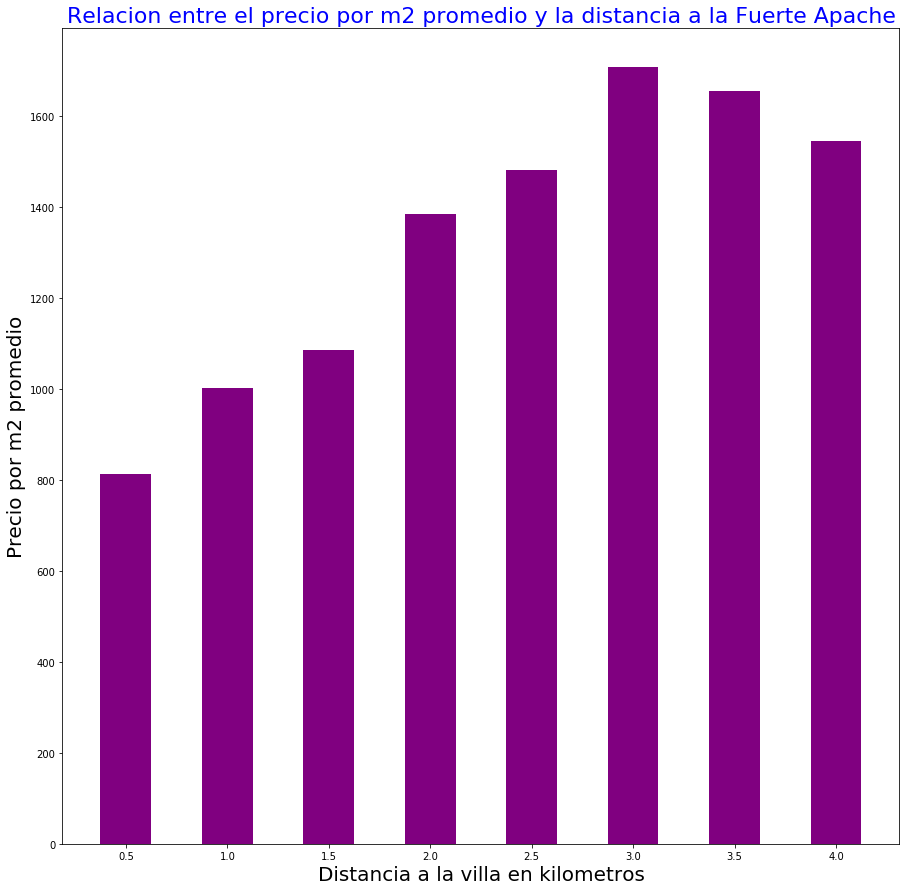

In [37]:
#Vamos a comparar propiedades que estan entre 0mts a 4000mts de distancia.
propiedadesCercanasAFuerteApache4000 = propiedadesCercanasAFuerteApache.loc[propiedadesCercanasAFuerteApache['distanciaAFuerteApache'] < 4000, :]
groupbyDistFuerteApache = propiedadesCercanasAFuerteApache4000.groupby(pd.cut(propiedadesCercanasAFuerteApache4000['distanciaAFuerteApache'], range(0, 4001, 500)), as_index= False)
mediaPrecioFuerteApache = groupbyDistFuerteApache['price_usd_per_m2'].agg(['mean'])
distKm = (np.arange(groupbyDistFuerteApache.ngroups) + 1)*0.5

plt.figure(figsize=(15, 15));
plt.bar(distKm, mediaPrecioFuerteApache['mean'], width= 0.25, color = 'purple')
plt.xticks(distKm, size = 'medium')
plt.title('Relacion entre el precio por m2 promedio y la distancia a la Fuerte Apache', fontsize = 22, color = 'Blue')
plt.xlabel('Distancia a la villa en kilometros', fontsize = 20)
plt.ylabel('Precio por m2 promedio', fontsize = 20)

### En las cercanias de la villa Fuerte Apache se logra ver un notable descenso del precio por m2 de las propiedades. Tambien se percibe que el aumento en el precio es considerable mientras se acrecienta la distancia con respecto a la villa.

In [38]:
#Por ultimo, analizamos la villa Carlos Gardel
propiedadesCercanasACarlosGardel = propiedadesDistancia.copy(deep = True)
propiedadesCercanasACarlosGardel.loc[:, 'distanciaACarlosGardel'] = propiedadesCercanasACarlosGardel['geoPos'].apply(distanciaACarlosGardel)

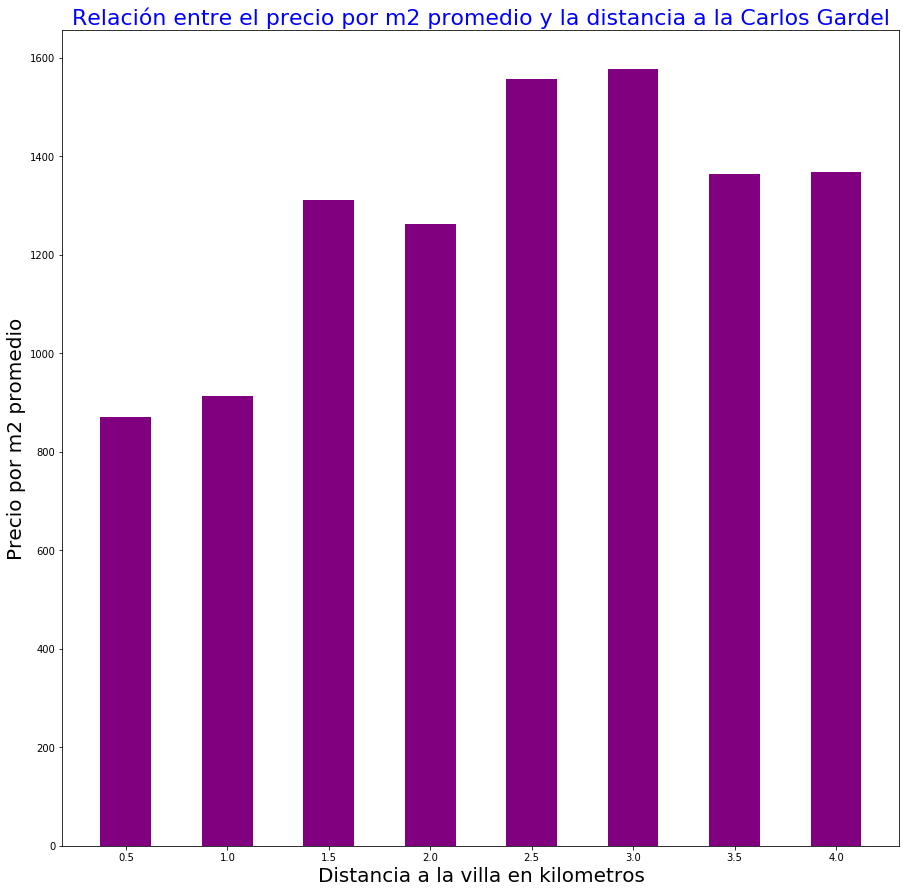

In [39]:
#Vamos a comparar propiedades que estan entre 0mts a 4000mts de distancia.
propiedadesCercanasACarlosGardel4000 = propiedadesCercanasACarlosGardel.loc[propiedadesCercanasACarlosGardel['distanciaACarlosGardel'] < 4000, :]
groupbyDistCarlosGardel = propiedadesCercanasACarlosGardel4000.groupby(pd.cut(propiedadesCercanasACarlosGardel4000['distanciaACarlosGardel'], range(0, 4001, 500)), as_index= False)
mediaPrecioCarlosGardel = groupbyDistCarlosGardel['price_usd_per_m2'].agg(['mean'])
distKm = (np.arange(groupbyDistCarlosGardel.ngroups) + 1)*0.5

plt.figure(figsize=(15, 15));
plt.bar(distKm, mediaPrecioCarlosGardel['mean'], width= 0.25, color = 'purple')
plt.xticks(distKm, size = 'medium')
plt.title('Relación entre el precio por m2 promedio y la distancia a la Carlos Gardel', fontsize = 22, color = 'Blue')
plt.xlabel('Distancia a la villa en kilometros', fontsize = 20)
plt.ylabel('Precio por m2 promedio', fontsize = 20)

### En las cercanias de la villa Carlos Gardel se logra ver un notable descenso del precio por m2 de las propiedades. Tambien se percibe que el aumento en el precio es considerable mientras se acrecienta la distancia con respecto a la villa.

### Con estos datos podemos asegurar que cuanto mayor sea la distancia a una villa de emergencia, el precio por m2 de las propiedades aumenta pero solo ocurre para la provincia de Buenos Aires porque esta mas alejada del centro de la ciudad. Las villas que se encuentren cerca del centro, tienen un menor impacto en el valor del m2.

## 3) Análisis de la relacion entre el precio por m2 y la cercania a estaciones de subtes.

In [40]:
#Coordenadas de todas las estaciones de subtes separada cada una por su respectiva linea
def obtener_subtes_cercanos(geoPos):
    lineaE = [(-34.609563795, -58.374052048), (-34.612989872, -58.377828598),(-34.618217016, -58.381583691), (-34.622366711, -58.385403156),
              (-34.622455000, -58.391432762), (-34.623125994, -58.397119045), (-34.623867613, -58.402848244), (-34.624679854, -58.409628868),
              (-34.625545060, -58.416645527), (-34.626798708, -58.426151276), (-34.628069994, -58.434305191), (-34.631618899, -58.442544937),
              (-34.636385845, -58.450076580), (-34.639563657, -58.457865715), (-34.642829615, -58.461534977)]
    
    lineaA = [(-34.608557137, -58.374567032), (-34.609086958, -58.382549286), (-34.609404849, -58.386669159), (-34.609652097, -58.398342133),
              (-34.609687418, -58.406839371), (-34.610782364, -58.415164948), (-34.615091365, -58.429327011), (-34.611736015, -58.421730995),
              (-34.618022770, -58.435893059), (-34.620459643, -58.441429138), (-34.623567434, -58.448810577), (-34.626533854, -58.456192017)]
    
    lineaB = [(-34.602870174, -58.369545937), (-34.603294060, -58.374567032), (-34.604141827, -58.386712074), (-34.604530384, -58.392891884),
              (-34.604530384, -58.399200439), (-34.604565707, -58.405079842), (-34.604106503, -58.411602974), (-34.603152765, -58.421001434),
              (-34.602057719, -58.430914879), (-34.599055099, -58.439583778), (-34.591671724, -58.447651863), (-34.584111033, -58.466534615),
              (-34.581567095, -58.473873138), (-34.573828804, -58.487434387)]
    
    lineaC = [(-34.590505868, -58.376069069), (-34.595522465, -58.377442360), (-34.602022395, -58.378129005), (-34.608980994, -58.380703926),
              (-34.612407095, -58.380532265), (-34.618058088, -58.380274773), (-34.622331395, -58.379931450), (-34.627964055, -58.381175995)]
    
    lineaD = [(-34.607621111, -58.374266624), (-34.604336105, -58.380360603), (-34.601845773, -58.385360241), (-34.599426017, -58.392827511),
              (-34.599531993, -58.397955894), (-34.594497974, -58.402633667), (-34.591636395, -58.407139778), (-34.588244767, -58.411281109),
              (-34.585170985, -58.415830135), (-34.578440064, -58.426043987), (-34.575295247, -58.434326649), (-34.570242091, -58.444347382),
              (-34.566125132, -58.452243805), (-34.562396722, -58.456299305), (-34.555982053, -58.462092876)]
    
    lineaH = [(-34.588138777, -58.398170471), (-34.598684179, -58.403813839), (-34.603700283, -58.405380249), (-34.608945673, -58.405938148),
              (-34.615515189, -58.404779434), (-34.622896444, -58.402483463), (-34.629341261, -58.400981426), (-34.635255927, -58.399178982),
              (-34.637515748, -58.405981064), (-34.641796880, -58.412622213)]
    
    subtes = lineaA + lineaB + lineaC + lineaD + lineaE + lineaH
    cant_subtes_cercanos = 0
    
    for i in range(len(subtes)):
        if (distancia(geoPos, subtes[i]) <= 700):
            cant_subtes_cercanos += 1
    return cant_subtes_cercanos
    

In [41]:
#Agregamos a cada propiedad, la cantidad de estaciones de subtes que se encuentren a 700mts o menos.
propiedadesCercanasSubte = propiedadesDistancia.copy(deep = True)
propiedadesCercanasSubte.loc[:,'cant_subtes_cercanos'] = propiedadesCercanasSubte['geoPos'].apply(obtener_subtes_cercanos)

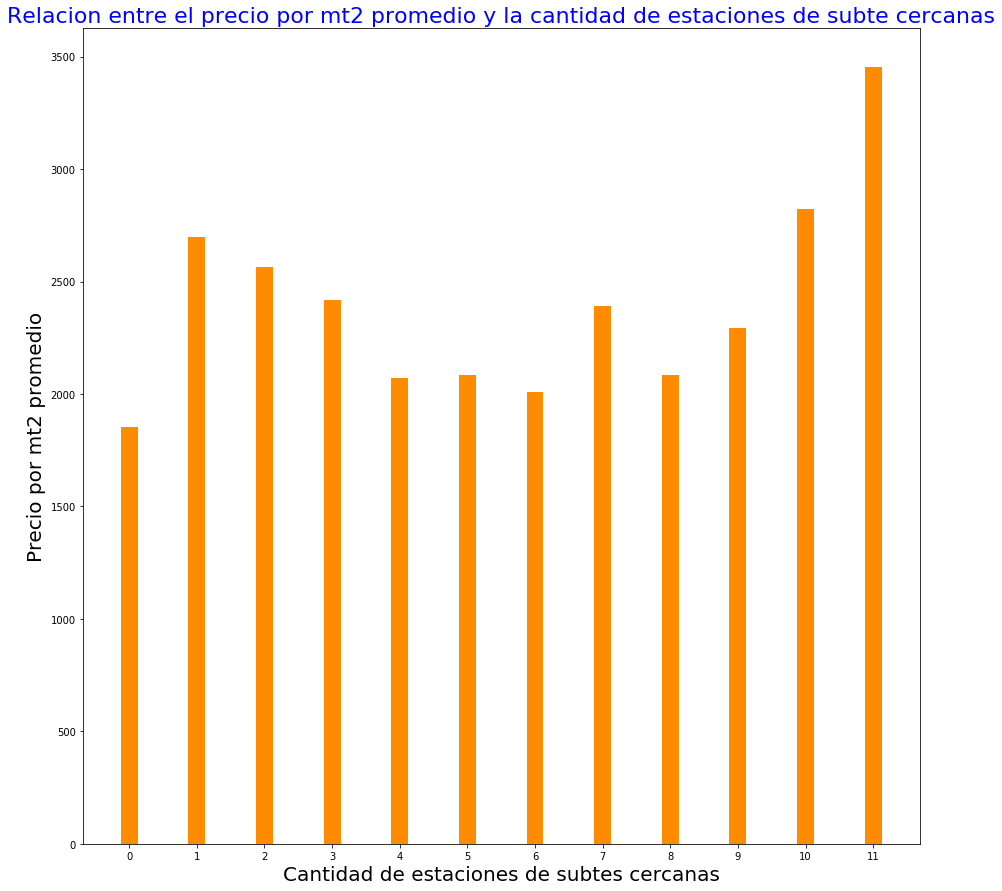

In [42]:
#Las propiedades que tienen al menos una estacion de subte a 700m tienen en promedio mayor precio por m2
groupbySubte = propiedadesCercanasSubte.groupby('cant_subtes_cercanos')
mediaGroupbySubte = groupbySubte['price_usd_per_m2'].agg(['mean'])

cant_estaciones = np.arange(groupbySubte.ngroups)

plt.figure(figsize=(15, 15));
plt.bar(cant_estaciones, mediaGroupbySubte['mean'], width= 0.25, color = 'darkorange')
plt.xticks(cant_estaciones, size = 'medium')
plt.title('Relacion entre el precio por mt2 promedio y la cantidad de estaciones de subte cercanas', fontsize = 22, color = 'Blue')
plt.xlabel('Cantidad de estaciones de subtes cercanas', fontsize = 20)
plt.ylabel('Precio por mt2 promedio', fontsize = 20)

### Este grafico nos demuestra que las propiedades que tienen al menos una estacion de subte cerca, tienen en promedio un precio por m2 mayor a aquellas que no poseen un estacion de subte cercana.Tambien nos informa que no tiene relevancia la cantidad de estaciones cercanas, solo importa que este cerca de una.

## 4) Análisis de la realción del precio por m2 y la cercanía a estaciones de tren

In [43]:
#Coordenadas de estaciones de trenes separadas por su respectiva linea.
def obtener_distancias_a_trenes(geoPos):
    lineaSanMartin = [(-34.590505868, -58.376069069), (-34.578987744, -58.426752090), (-34.592448952, -58.446493149),
                      (-34.596794231, -58.466062546), (-34.601492528, -58.494043350), (-34.602446285, -58.512883186),
                      (-34.603364708, -58.527774811), (-34.603788592, -58.540949821), (-34.604671676, -58.564724922),
                      (-34.604848292, -58.596138954), (-34.590965146, -58.632230759), (-34.578563734, -58.656563759),
                      (-34.563722005, -58.684630394), (-34.551316528, -58.703513145), (-34.544070309, -58.713254929),
                      (-34.519074848, -58.750634193), (-34.503798116, -58.797540665), (-34.490844294, -58.839511871),
                      (-34.478719817, -58.877105713), (-34.468530709, -58.908262253)]
    
    lineaUrquiza = [(-34.586796217, -58.455419540), (-34.590081916, -58.466577530), (-34.592378295, -58.476104736),
                    (-34.592961212, -58.494215012), (-34.594409655, -58.502969742), (-34.595557792, -58.510587215),
                    (-34.597218148, -58.524470329), (-34.595469475, -58.535284996), (-34.593773756, -58.547022343),
                    (-34.591689388, -58.559403419), (-34.589958263, -58.571977615), (-34.588933703, -58.590688705), 
                    (-34.588421418, -58.607017994), (-34.587767808, -58.620772362), (-34.587608821, -58.629484177),
                    (-34.580136095, -58.640384674), (-34.573369430, -58.645083904), (-34.562856156, -58.659975529),
                    (-34.555593269, -58.669481277), (-34.549089709, -58.678472042), (-34.543292628, -58.686540127),
                    (-34.536575994, -58.695423603), (-34.532846260, -58.700573444)]
    
    lineaRoca = [(-34.625929, -58.381537), (-34.653588, -58.378764), (-34.661962, -58.376580), (-34.686132, -58.383069), 
                 (-34.707708, -58.391056), (-34.726060, -58.390585), (-34.743153, -58.395465), (-34.761184, -58.397406), 
                 (-34.775976, -58.396176), (-34.795120, -58.408172), (-34.796928, -58.428929), (-34.803084, -58.448641),
                 (-34.814747, -58.469670), (-34.833361, -58.496412), (-34.854207, -58.522616), (-34.678947, -58.345075),
                 (-34.691431, -58.325349), (-34.697429, -58.311186), (-34.703336, -58.296038), (-34.709460, -58.280410),
                 (-34.724708, -58.260829), (-34.751987, -58.234202), (-34.763887, -58.208775), (-34.775144, -58.194796),
                 (-34.789613, -58.203033), (-34.807186, -58.213065), (-34.819260, -58.230481)]
    
    lineaMitre = [(-34.589495900, -58.375815000), (-34.571805900, -58.425271100), (-34.575154900, -58.432836300), 
                  (-34.573093100, -58.448278700), (-34.567728900, -58.461285900), (-34.568478300, -58.479030100), 
                  (-34.574920000, -58.487589000), (-34.580332000, -58.501930000), (-34.582301700, -58.517546400), 
                  (-34.573738900, -58.531764100), (-34.563129900, -58.540566100), (-34.557439000, -58.547953800), 
                  (-34.550860200, -58.556444200), (-34.542311700, -58.567056900), (-34.534233500, -58.576114100),
                  (-34.565444000, -58.475835000), (-34.554347600, -58.486654600), (-34.542106100, -58.494398600),
                  (-34.529326200, -58.494565900), (-34.523137200, -58.494077700), (-34.514509800, -58.489039400),
                  (-34.562738100, -58.435664200), (-34.558524000, -58.449531000), (-34.548763000, -58.463060000),
                  (-34.536155000, -58.468273900), (-34.524049100, -58.473396200), (-34.508383800, -58.480840100),
                  (-34.497587000, -58.488880900), (-34.487893200, -58.497004400), (-34.479836700, -58.503698100),
                  (-34.471657700, -58.514076400), (-34.460823300, -58.526215300), (-34.455746600, -58.540753700),
                  (-34.450016200, -58.551330000), (-34.444265500, -58.558544900), (-34.436394400, -58.568376300),
                  (-34.423474500, -58.581848200)]
    
    lineaBelgranoSur = [(-34.712196387, -58.524127007), (-34.710679445, -58.537001610), (-34.708809687, -58.551721573),
                        (-34.704434996, -58.587427139), (-34.699566116, -58.626222610), (-34.696849297, -58.647508621),
                        (-34.691927041, -58.686497211), (-34.708986081, -58.731236458), (-34.722249832, -58.530778885),
                        (-34.750622175, -58.584401608), (-34.756387146, -58.601760864), (-34.760230237, -58.615579605),
                        (-34.771652680, -58.646779060), (-34.645424635, -58.393964767), (-34.648884536, -58.415679932),
                        (-34.662228516, -58.440999985), (-34.665334743, -58.448553085), (-34.677299687, -58.477134705),
                        (-34.683757921, -58.491854668), (-34.689968643, -58.507561684), (-34.702318127, -58.511638641),
                        (-34.710714723, -58.514385223), (-34.710291385, -58.505930901), (-34.718122776, -58.477563858),
                        (-34.718934094, -58.462457657), (-34.704928924, -58.440527916), (-34.697801958, -58.429198265),
                        (-34.681322908, -58.428468704), (-34.661028352, -58.415594101)]
    
    lineaBelgranoNorte = [(-34.575254, -58.399343), (-34.543440, -58.447546), (-34.537156, -58.477231), 
                          (-34.543428, -58.500637), (-34.537072, -58.513160), (-34.531088, -58.524844), 
                          (-34.528640, -58.537715), (-34.523648, -58.546230), (-34.508921, -58.564748),
                          (-34.504075, -58.620185), (-34.502567, -58.641925), (-34.502914, -58.666516),
                          (-34.503488, -58.680711), (-34.498965, -58.694541), (-34.493690, -58.706301),
                          (-34.485394, -58.725105), (-34.478762, -58.739754), (-34.470653, -58.757971),
                          (-34.463085, -58.774975), (-34.453257, -58.796700), (-34.416597, -58.871704)]
    
    trenes = lineaSanMartin + lineaUrquiza + lineaRoca + lineaMitre + lineaBelgranoSur + lineaBelgranoNorte
    cant_trenes_cercanos = 0
    
    for i in range(len(trenes)):
        if (distancia(geoPos, trenes[i]) <= 800):
            cant_trenes_cercanos += 1
    return cant_trenes_cercanos

In [44]:
#Agregamos a cada propiedad, la cantidad de estaciones de trenes que se encuentren a 800mts o menos.
propiedadesCercanasTren = propiedadesDistancia.copy(deep = True)
propiedadesCercanasTren.loc[:,'cant_trenes_cercanos'] = propiedadesCercanasTren['geoPos'].apply(obtener_distancias_a_trenes)

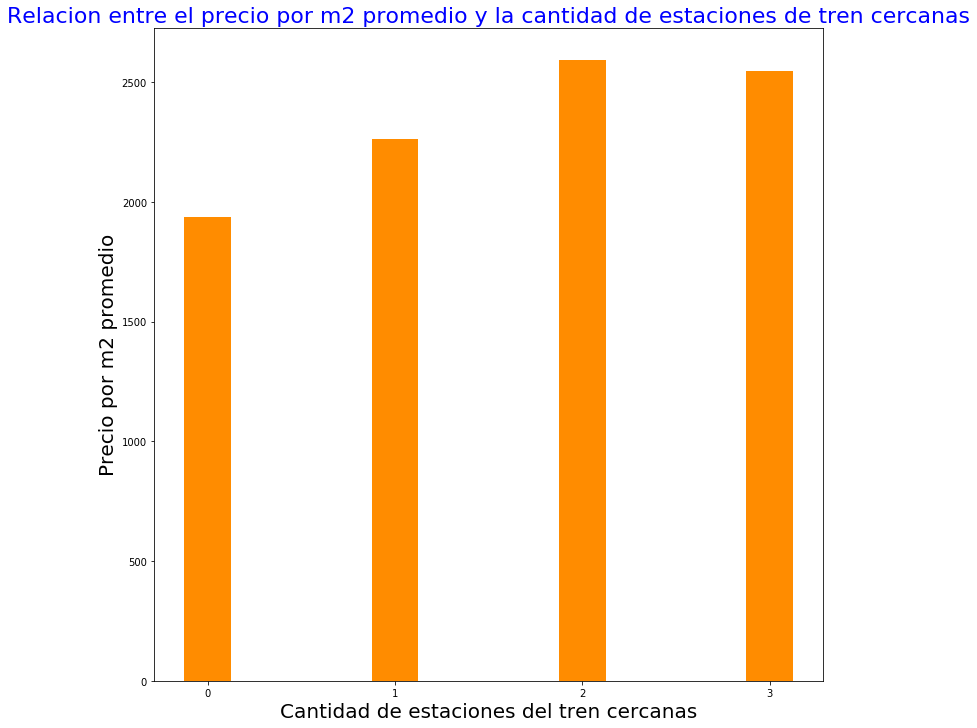

In [45]:
#Las propiedades que tienen al menos una estacion de Tren a 800m tienen en promedio mayor precio por m2
groupbyTren = propiedadesCercanasTren.groupby('cant_trenes_cercanos')
mediaGroupbyTren = groupbyTren['price_usd_per_m2'].agg(['mean'])

cant_estaciones = np.arange(groupbyTren.ngroups)

plt.figure(figsize=(12, 12));
plt.bar(cant_estaciones, mediaGroupbyTren['mean'], width= 0.25, color = 'darkorange')
plt.xticks(cant_estaciones, size = 'medium')
plt.title('Relacion entre el precio por m2 promedio y la cantidad de estaciones de tren cercanas', fontsize = 22, color = 'Blue')
plt.xlabel('Cantidad de estaciones del tren cercanas', fontsize = 20)
plt.ylabel('Precio por m2 promedio', fontsize = 20)

### Al igual que pasa con el subte, el precio por m2 promedio aumenta si la propiedad esta cercana a una estacion de tren, pero dicho aumento no es tan drastico como sucedia con el subte. Se necesitan al menos dos estaciones de tren cerca, para que el promedio del precio por m2 de una propiedad sea considerable con respecto a aquellas propiedades que no poseen un estacion de tren cercana.

In [46]:
#funcion para obtener la suma de estaciones de trenes y estaciones de subtes cercanas a una propiedad.
def obtener_distancia_subteytren(geoPos):
    return obtener_subtes_cercanos(geoPos) + obtener_distancias_a_trenes(geoPos)

In [47]:
#Agregamos a cada propiedad, la cantidad de estaciones de trenes y estaciones de subtes que tiene a los alrededores.
propiedadesCercanasSubteyTren = propiedadesDistancia.copy(deep = True)
propiedadesCercanasSubteyTren['cant_subteytren'] = propiedadesCercanasSubteyTren['geoPos'].apply(obtener_distancia_subteytren)  

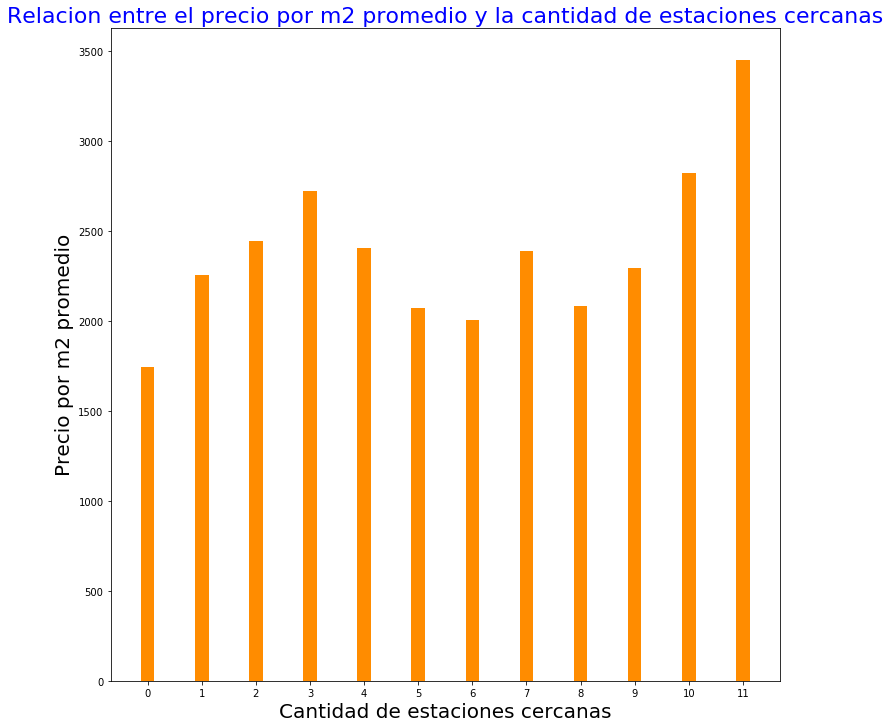

In [48]:
groupbySubteTren = propiedadesCercanasSubteyTren.groupby('cant_subteytren')
mediaGoupbySubteTren = groupbySubteTren['price_usd_per_m2'].agg(['mean'])

cant_estaciones = np.arange(groupbySubteTren.ngroups)

plt.figure(figsize=(12, 12));
plt.bar(cant_estaciones, mediaGoupbySubteTren['mean'], width= 0.25, color = 'darkorange')
plt.xticks(cant_estaciones, size = 'medium')
plt.title('Relacion entre el precio por m2 promedio y la cantidad de estaciones cercanas', fontsize = 22, color = 'Blue')
plt.xlabel('Cantidad de estaciones cercanas', fontsize = 20)
plt.ylabel('Precio por m2 promedio', fontsize = 20)


### Este grafico nos demuestra que las propiedades que tienen al menos una estacion de subte o tren cerca tienen en promedio un precio por m2 mayor a aquellas que no poseen ninguna estacion cercana. Tambien se ve que a partir de 3 estaciones, el precio por m2 comienza bajar. Creemos que el precio promedio por m2 de las propiedades que tienen 11 estaciones de subte o trenes cercanas es relativamente alto no por la cantidad de estaciones sino porque estas se encuentran en el barrio de Puerto Madero donde el precio por m2 es bastante elevado. 

In [49]:
#Coordenadas de las estaciones del subte H inaguradas a principio de 2016.
def distanciaANuevasEstaciones(geoPos):
   
    #Ubicacion de las estaciones
    Cordoba = (-34.598691, -58.403841) #Inicio Obras: 17 ene 2012 - Inauguracion: 18 dic 2015
    SantaFe = (-34.594848, -58.402517) #Inicio Obras: 17 ene 2012 - Inauguracion: 12 jul 2016
    LasHeras = (-34.587879, -58.397970) #Inicio Obras: 17 ene 2012 - Inauguracion: 18 dic 2015

    distACordoba = distancia(geoPos, Cordoba)
    distASantaFe = distancia(geoPos, SantaFe)
    distALasHeras = distancia(geoPos, LasHeras)
    

    return min(distACordoba, distASantaFe, distALasHeras)

# Análisis de los barrios más afectados por nuevas estaciones en el subte H


## Veamos el precio del m2 en recoleta por año

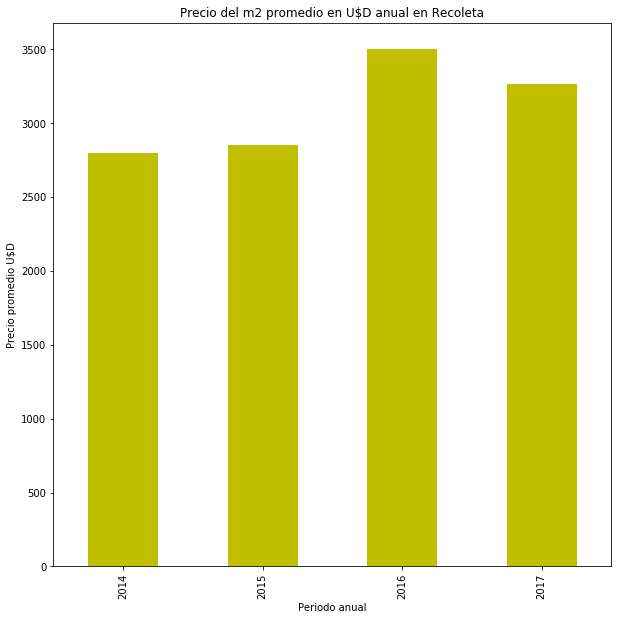

In [50]:
propiedadesEnRecoleta = propiedadesPorBarrio.copy(deep = True)
propiedadesEnRecoleta = propiedadesEnRecoleta.loc[propiedadesEnRecoleta.place_name.str.contains('Recoleta') ,:]
recoletaPorMes = propiedadesEnRecoleta.groupby(propiedadesEnRecoleta.created_on.dt.year).agg([np.size, np.mean])
recoletaPorMes = recoletaPorMes.loc[recoletaPorMes['price_usd_per_m2']['size'] > 5.0, :]

plt.figure(figsize=(10,10))
recoletaPorMes['price_usd_per_m2']['mean'].plot(kind ='bar', color='y', legend=False)
plt.title('Precio del m2 promedio en U$D anual en Recoleta')
plt.xlabel("Periodo anual")
plt.ylabel("Precio promedio U$D")

## Se puede ver una suba de precios de 2015 a 2016. Esto puede ser por la cercania de las propiedades a las nuevas estaciones del subte H. Veamoslo

### Precio por m2 en relacion a la cercania al Subte H y al año de su inauguracion

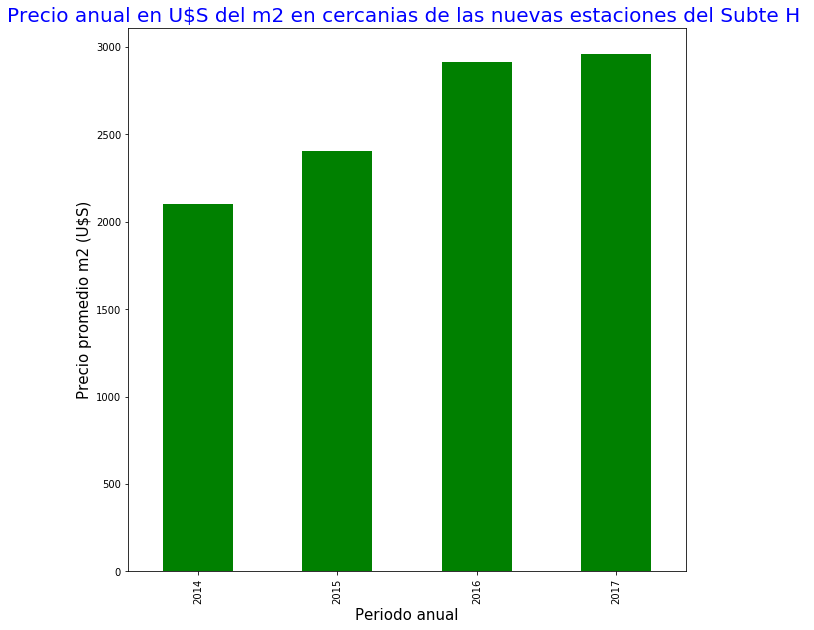

In [51]:
#Nos quedamos con propiedades que estan a menos de 400mts
cercanasANuevasEstaciones = propiedadesDistancia.copy(deep = True)
cercanasANuevasEstaciones.loc[:, 'distanciaAEstacion'] = cercanasANuevasEstaciones['geoPos'].apply(distanciaANuevasEstaciones)
cercanasANuevasEstaciones = cercanasANuevasEstaciones.loc[cercanasANuevasEstaciones["distanciaAEstacion"] < 400, :]

cercanasANuevasEstaciones.groupby(cercanasANuevasEstaciones.created_on.dt.year)['price_usd_per_m2'].agg(np.mean)\
.plot(kind ='bar', color='g', legend = False, figsize = (10, 10))
plt.title("Precio anual en U$S del m2 en cercanias de las nuevas estaciones del Subte H ", fontsize = 20, color = 'blue')
plt.xlabel("Periodo anual", fontsize = 15)
plt.ylabel("Precio promedio m2 (U$S)", fontsize = 15)

## Viendo que pasa en Villa Urquiza en los ultimos 2 años

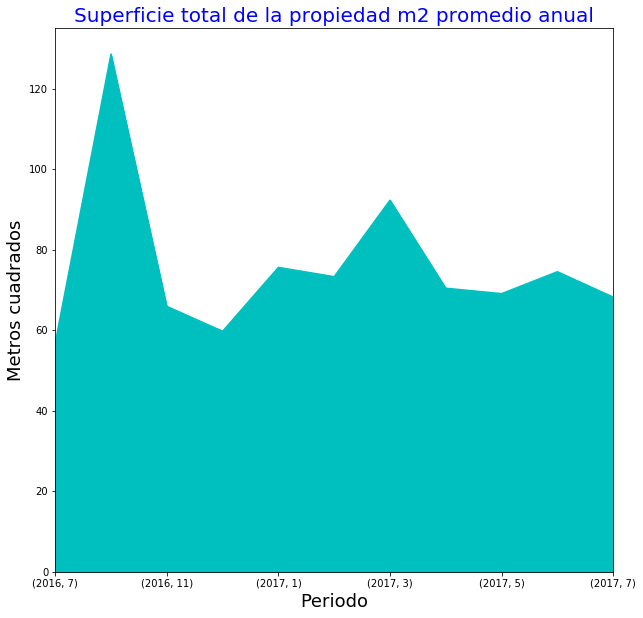

In [52]:
propVillaUrquiza = propiedadesDistancia.copy(deep=True)
propVillaUrquiza20172016 = propVillaUrquiza.loc[(propVillaUrquiza.place_name.str.contains('Villa Urquiza')) & (propVillaUrquiza.created_on.dt.year > 2015), :]


propVillaUrquiza20172016grouped = propVillaUrquiza20172016.groupby([propVillaUrquiza20172016.created_on.dt.year, propVillaUrquiza20172016.created_on.dt.month ])\
['surface_total_in_m2'].agg(['mean', 'size'])
#Solo tomo los que tengan mas de 10 casas
propVillaUrquiza20172016grouped = propVillaUrquiza20172016grouped.loc[propVillaUrquiza20172016grouped['size'] > 10, :]

#Superficie total de las publicaciones (fue bajando a lo largo de los ultimos meses)
propVillaUrquiza20172016grouped['mean'].plot( kind = 'area', color = 'c', figsize = (10,10))
plt.title("Superficie total de la propiedad m2 promedio anual", fontsize = 20, color = 'blue')
plt.xlabel("Periodo", fontsize = 18);
plt.ylabel("Metros cuadrados", fontsize =18);
#Porcentaje cubierto promedio

## Vemos que el promedio de la superficie cubierta para las propiedades publicadas fue bajando y esta causa puede ser la expansion del barrio, el cual crecio "para arriba", construyendose muchos edificios. Esto lo podemos comprobar facilmente:

In [53]:
propVillaUrquiza20172016['property_type'].value_counts()

apartment    834
PH            69
house         43
store         17
Name: property_type, dtype: int64

### Aca se ve como se vendieron muchos mas departamentos que otro tipo de propiedad durante estos ultimos dos años.

## Analisis de la relacion entre la inseguridad y el precio por m2

#### En este analisis no se tienen en cuenta las propiedades fuera de Capital Federal, por su lejania con respecto a los lugares analizados. 

In [54]:
def obtenerDistanciaZonaInsegura(geoPos):
    #Obtenemos las coordenadas de las comisarias mas afectadas.
    comisarias = [(-34.630975500, -58.458303800), (-34.602049200, -58.373201600), (-34.629577700, -58.524118200), 
                  (-34.560070200, -58.456198000), (-34.661963300, -58.501216900), (-34.604256000, -58.415567000), 
                  (-34.626941500, -58.447969600)]
    
    distancias = [obtenerDistanciaDelitoMenor(geoPos), obtenerDistanciaDelitoGrave(geoPos)] 
    for i in range(len(comisarias)):
        distancias.append(distancia(geoPos, comisarias[i]))
       
    return min( distancias)

def obtenerDistanciaDelitoMenor(geoPos):
    #Obtenenemos las coordenadas de los puntos donde se concentran la mayor cantidad de delitos.
    delitosMenores = [(-34.592166325, -58.373794556), (-34.584245294, -58.390552998), (-34.598480800, -58.403680000), 
                      (-34.535819454, -58.466749191), (-34.539142518, -58.475718498), (-34.562117527, -58.456835747),
                      (-34.570174948, -58.444776535), (-34.563255508, -58.438510895), (-34.577630903, -58.426966667),
                      (-34.581694293, -58.420443535), (-34.599066000, -58.382093800), (-34.617612000, -58.380684900)]
    distancias = [] 
    for i in range(len(delitosMenores)):
        distancias.append(distancia(geoPos, delitosMenores[i]))
    
    return min( distancias)

def obtenerDistanciaDelitoGrave(geoPos):
    delitosGraves = [(-34.635299800, -58.487350800), (-34.626672200, -58.456726200), (-34.630691600, -58.469656000),
                      (-34.617770100, -58.476078700), (-34.618856000, -58.403548700), (-34.610105500, -58.405879100), 
                      (-34.665207669, -58.469409943), (-34.637247398, -58.410530090)]
    distancias = [] 
    for i in range(len(delitosGraves)):
        distancias.append(distancia(geoPos, delitosGraves[i]))
    
    return min( distancias)

#Datos sacados de estas paginas:
#http://www.diariosobrediarios.com.ar/dsd/notas/1/28046-el-crimen-porteno-bajo-distintas-varas-mediaticas.php#.WdvtqTeQz0p
#http://www.lanacion.com.ar/1873765-aumentaron-los-delitos-violentos-contra-las-personas-en-la-capital

In [55]:
zonasInseguras = propiedadesDistancia.copy(deep = True)
zonasInseguras = zonasInseguras.loc[zonasInseguras.state_name.str.contains('Capital Federal'), :]
zonasInseguras['distancia_zona_insegura'] = zonasInseguras['geoPos'].apply(obtenerDistanciaZonaInsegura) 

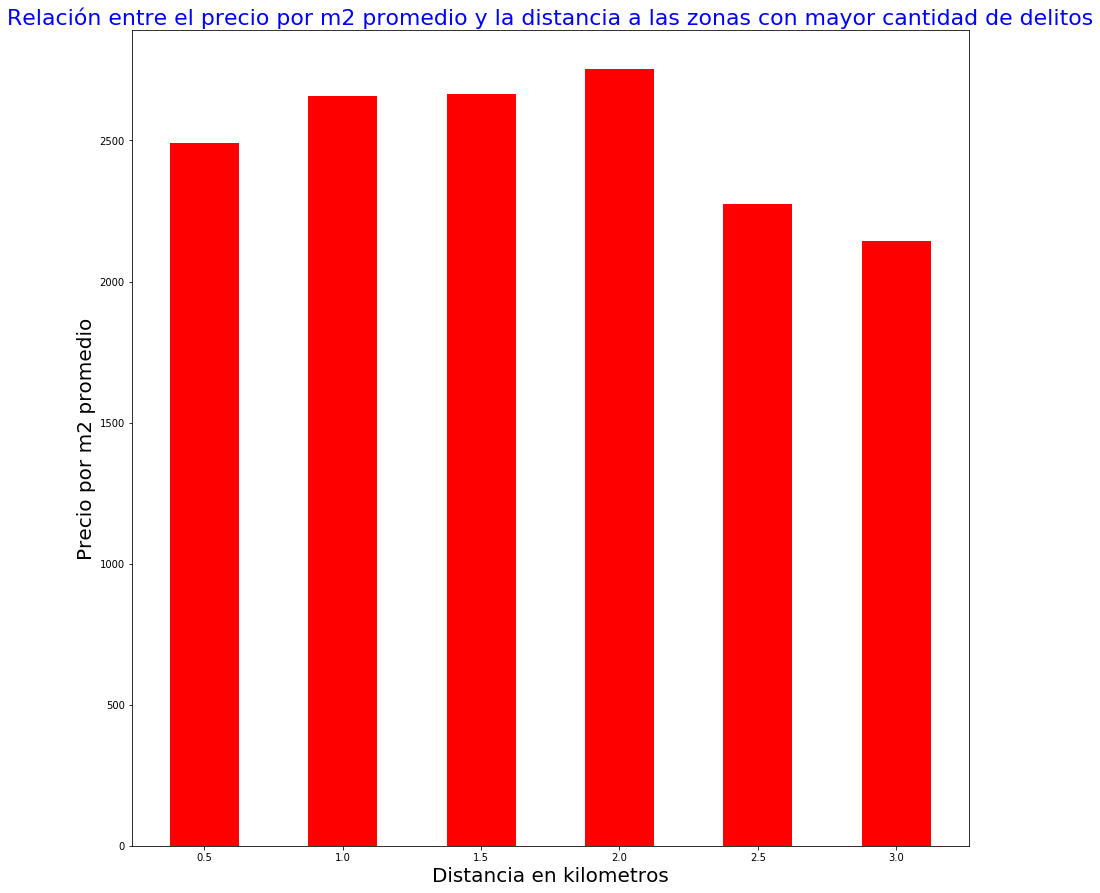

In [56]:
groupbyZonasInseguras = zonasInseguras.groupby(pd.cut(zonasInseguras['distancia_zona_insegura'], range(0, 3001, 500)), as_index= False)
mediaPrecioZonasInseguras = groupbyZonasInseguras['price_usd_per_m2'].agg(['mean'])

distKm = (np.arange(groupbyZonasInseguras.ngroups) + 1) * 0.5

plt.figure(figsize=(15, 15));
plt.bar(distKm, mediaPrecioZonasInseguras['mean'], width= 0.25, color = 'red')
plt.xticks(distKm, size = 'medium')
plt.title('Relación entre el precio por m2 promedio y la distancia a las zonas con mayor cantidad de delitos', fontsize = 22, color = 'Blue')
plt.xlabel('Distancia en kilometros', fontsize = 20)
plt.ylabel('Precio por m2 promedio', fontsize = 20)

#### El grafico anterior no permite realizar un evaluacion pertinente de la influencia de la inseguridad en el precio de la propiedad, por lo tanto se procede a separar los delitos segun su gravedad para poder realizar un analisis mas pertinente.

In [57]:
zonasInseguras['distancia_delitoMenor'] = zonasInseguras['geoPos'].apply(obtenerDistanciaDelitoMenor) 
zonasInseguras['distancia_delitoGrave'] = zonasInseguras['geoPos'].apply(obtenerDistanciaDelitoGrave)

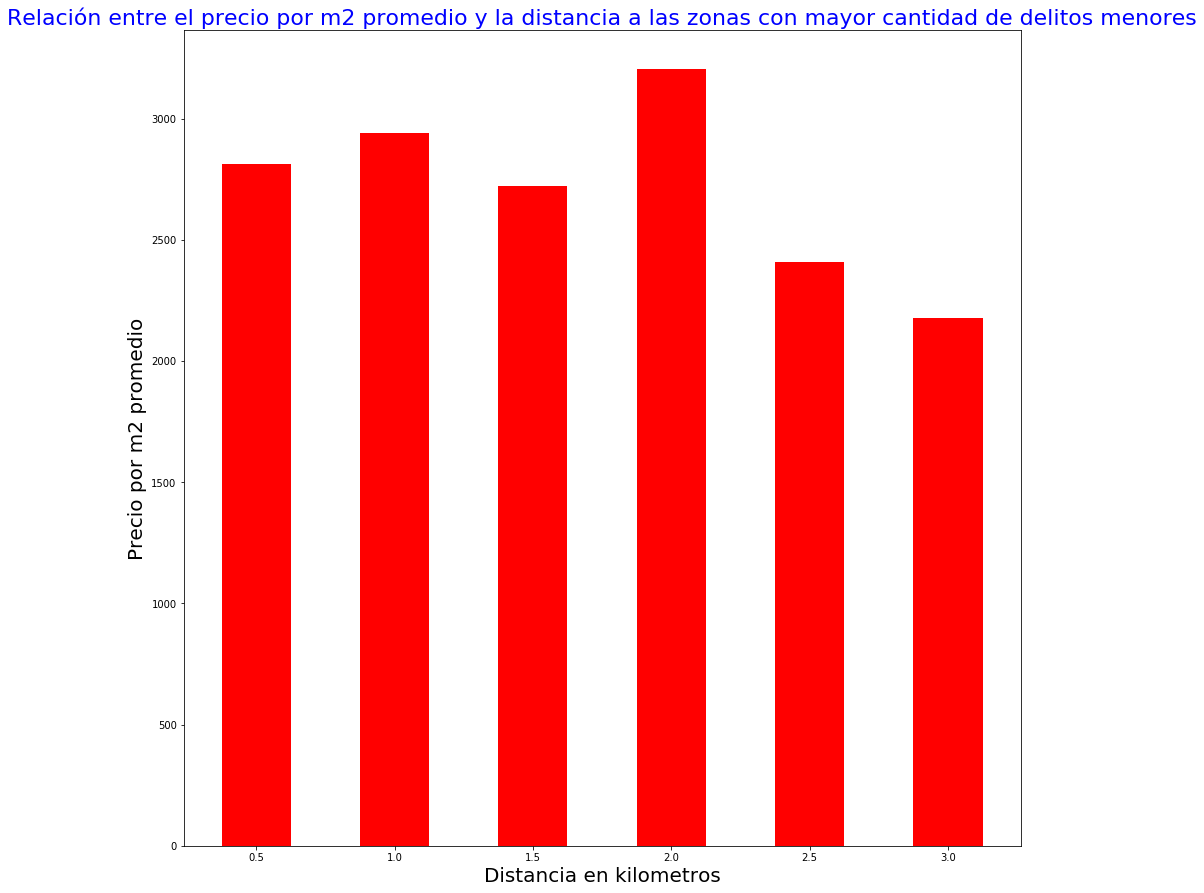

In [58]:
groupbyDelitosMenores = zonasInseguras.groupby(pd.cut(zonasInseguras['distancia_delitoMenor'], range(0, 3001, 500)), as_index= False)
mediaPrecioDelitosMenores = groupbyDelitosMenores['price_usd_per_m2'].agg(['mean'])

distKm = (np.arange(groupbyDelitosMenores.ngroups) + 1) * 0.5

plt.figure(figsize=(15, 15));
plt.bar(distKm, mediaPrecioDelitosMenores['mean'], width= 0.25, color = 'red')
plt.xticks(distKm, size = 'medium')
plt.title('Relación entre el precio por m2 promedio y la distancia a las zonas con mayor cantidad de delitos menores', fontsize = 22, color = 'Blue')
plt.xlabel('Distancia en kilometros', fontsize = 20)
plt.ylabel('Precio por m2 promedio', fontsize = 20)

#### Cuando se tiene en cuenta solo los hechos delictivos de menor gravedad( en su mayoria hurtos), la influencia de la inseguridad no se ve reflejada en el precio de las propiedades. Esto se debe a que la gran mayoria de estos delitos ocurren en Zona Norte y los mas afectados resultan ser los turistas.

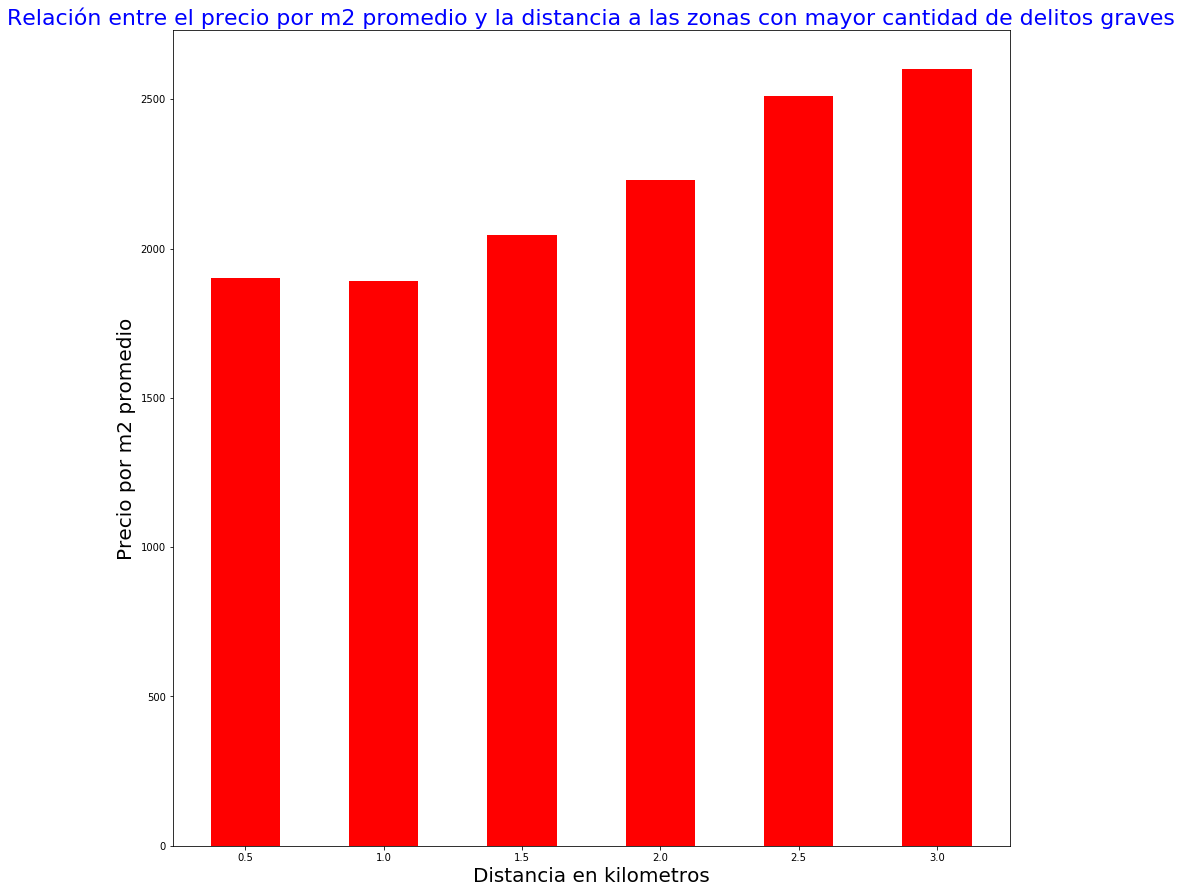

In [59]:
groupbyDelitosGraves = zonasInseguras.groupby(pd.cut(zonasInseguras['distancia_delitoGrave'], range(0, 3001, 500)), as_index= False)
mediaPrecioDelitosGraves = groupbyDelitosGraves['price_usd_per_m2'].agg(['mean'])

distKm = (np.arange(groupbyDelitosGraves.ngroups) + 1) * 0.5

plt.figure(figsize=(15, 15));
plt.bar(distKm, mediaPrecioDelitosGraves['mean'], width= 0.25, color = 'red')
plt.xticks(distKm, size = 'medium')
plt.title('Relación entre el precio por m2 promedio y la distancia a las zonas con mayor cantidad de delitos graves', fontsize = 22, color = 'Blue')
plt.xlabel('Distancia en kilometros', fontsize = 20)
plt.ylabel('Precio por m2 promedio', fontsize = 20)

#### Por lo contrario, cuando solo se tienen en cuenta los delitos de mayor gravedad (robo a mano armada, secuestros), se puede ver un impacto negativo en el precio de las propiedades cercanas a las zonas donde estos delitos son mas frecuentes.

## Comparamos el precio por m2 promedio de toda Capital Federal con el precio promedio de los barrios mas inseguros.

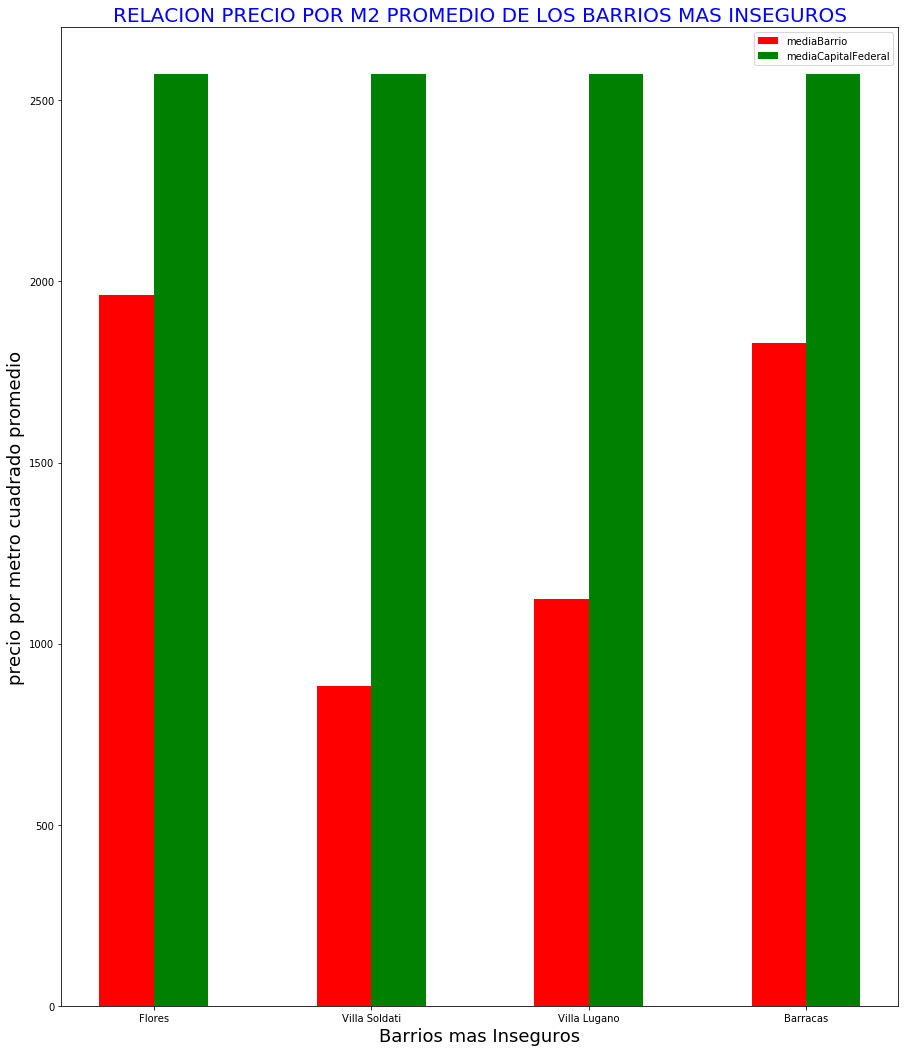

In [60]:
zonasInsegurasPorBarrio = zonasInseguras.groupby('place_name')
barriosMasPerligrosos = [zonasInsegurasPorBarrio.get_group('Flores'),zonasInsegurasPorBarrio.get_group('Villa Soldati'),
                         zonasInsegurasPorBarrio.get_group('Villa Lugano'), zonasInsegurasPorBarrio.get_group('Barracas')]
nombreBarriosMasPerligrosos = ['Flores', 'Villa Soldati', 'Villa Lugano', 'Barracas']
mediaCapital = zonasInseguras['price_usd_per_m2'].mean()
mediaCapitalArreglo = [mediaCapital, mediaCapital, mediaCapital, mediaCapital]

plt.figure(figsize=(15, 18));
mediaBarrios = []
for i in range(len(barriosMasPerligrosos)):
    mediaBarrios.append(barriosMasPerligrosos[i]['price_usd_per_m2'].mean())

x = np.arange(4)   
plt.bar(x, mediaBarrios, color = 'red', width=0.25 );
plt.bar(x + 0.25, mediaCapitalArreglo , color ='green',  width=0.25 );
plt.xticks(x + 0.125, nombreBarriosMasPerligrosos, size = 'medium')
plt.title('RELACION PRECIO POR M2 PROMEDIO DE LOS BARRIOS MAS INSEGUROS', fontsize = 20, color = 'blue')
plt.xlabel('Barrios mas Inseguros', fontsize = 18)
plt.ylabel('precio por metro cuadrado promedio', fontsize = 18)
plt.legend(('mediaBarrio', 'mediaCapitalFederal'))

### Con estos datos podemos asegurar que la inseguridad es un factor determinante a la hora de comprar un vivienda.

In [61]:
#Csv a Exportar

#Genero el dataframe que luego se va a exportar

dataAExportar = propiedadesDistancia.copy(deep = True)
dataAExportar['distancia_al_centro'] = propiedadesDistanciaCentro['distancia_al_centro']
dataAExportar['distanciaAIndoamericano'] = propiedadesCercanasAIndoamericano['distanciaAIndoamericano']
dataAExportar['distanciaAFuerteApache'] = propiedadesCercanasAFuerteApache['distanciaAFuerteApache']
dataAExportar['distanciaACarlosGardel'] = propiedadesCercanasACarlosGardel['distanciaACarlosGardel']
dataAExportar['cant_subtes_cercanos'] = propiedadesCercanasSubte['cant_subtes_cercanos']
dataAExportar['cant_trenes_cercanos'] = propiedadesCercanasTren['cant_trenes_cercanos']

dataAExportar = dataAExportar[dataAExportar['distancia_al_centro'].notnull()].drop(['surface_covered_in_m2', 'description'], axis = 1)

dataAExportar.info()
dataAExportar.to_csv('dataFiltrada.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46003 entries, 0 to 46016
Data columns (total 21 columns):
index                      46003 non-null int64
created_on                 46003 non-null datetime64[ns]
operation                  46003 non-null object
property_type              46003 non-null object
state_name                 46003 non-null object
place_name                 46003 non-null object
lat                        46003 non-null float64
lon                        46003 non-null float64
price                      46003 non-null float64
surface_total_in_m2        46003 non-null float64
price_usd_per_m2           46003 non-null float64
cant_prop                  46003 non-null float64
media_por_barrio           46003 non-null float64
mediana_por_barrio         46003 non-null float64
geoPos                     46003 non-null object
distancia_al_centro        46003 non-null float64
distanciaAIndoamericano    46003 non-null float64
distanciaAFuerteApache     46003 non-null